In [1]:
!pip install emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 2.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
import numpy as np
!pip install emoji
import emoji
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 964.9 kB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading data from csv & Read the  files
df1 = pd.read_csv('/content/drive/MyDrive/Social Media Analytics/Covid-19 Twitter Dataset (Apr-Jun 2020).csv')

# Read the second file
df2 = pd.read_csv('/content/drive/MyDrive/Social Media Analytics/Covid-19 Twitter Dataset (Aug-Sep 2020).csv')

# Read the third file
df3 = pd.read_csv('/content/drive/MyDrive/Social Media Analytics/Covid-19 Twitter Dataset (Apr-Jun 2021).csv')



In [5]:

# Display info about each dataframe
print("Dataframe 1 (Apr-Jun 2020) structure:")
print(df1.info())
print("\nDataframe 2 (Aug-Sep 2020) structure:")
print(df2.info())
print("\nDataframe 3 (Apr-Jun 2021) structure:")
print(df3.info())

Dataframe 1 (Apr-Jun 2020) structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143903 entries, 0 to 143902
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               143901 non-null  float64
 1   created_at       143902 non-null  object 
 2   source           143876 non-null  object 
 3   original_text    143902 non-null  object 
 4   lang             143902 non-null  object 
 5   favorite_count   143902 non-null  float64
 6   retweet_count    143902 non-null  float64
 7   original_author  143902 non-null  object 
 8   hashtags         28510 non-null   object 
 9   user_mentions    107332 non-null  object 
 10  place            105021 non-null  object 
 11  clean_tweet      143419 non-null  object 
 12  compound         143903 non-null  float64
 13  neg              143903 non-null  float64
 14  neu              143903 non-null  float64
 15  pos              143903 non-null  float64
 16  

In [6]:
# Display the first few rows of each dataframe to verify
print("Dataframe 1:")
print(df1.head())
print("\nDataframe 2:")
print(df2.head())
print("\nDataframe 3:")
print(df3.head())

Dataframe 1:
             id  created_at  \
0  1.250000e+18  2020-04-19   
1  1.250000e+18  2020-04-19   
2  1.250000e+18  2020-04-19   
3  1.250000e+18  2020-04-19   
4  1.250000e+18  2020-04-19   

                                              source  \
0  <a href="http://twitter.com/download/android" ...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/android" ...   

                                       original_text lang  favorite_count  \
0  RT @GlblCtzn: .@priyankachopra is calling on l...   en             0.0   
1  RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-...   en             0.0   
2  RT @AdvoBarryRoux: These 5 police officials ba...   en             0.0   
3  RT @MobilePunch: COVID-19: Oyo discharges two ...   en             0.0   
4  My Condolences to the Family of those who did ...   en             0.0   



In [7]:
# Check the shapes of the dataframes
print("\nShape of df1:", df1.shape)
print("Shape of df2:", df2.shape)
print("Shape of df3:", df3.shape)

# Combine all dataframes
df_combined = pd.concat([df1, df2, df3], ignore_index=True)

print("\nShape of combined dataframe:", df_combined.shape)



Shape of df1: (143903, 17)
Shape of df2: (120509, 17)
Shape of df3: (147475, 17)

Shape of combined dataframe: (411887, 17)


In [8]:
# Display info about the combined dataframe
print("\nCombined Dataframe Info:")
df_combined.info()



Combined Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411887 entries, 0 to 411886
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               411883 non-null  float64
 1   created_at       411885 non-null  object 
 2   source           411587 non-null  object 
 3   original_text    411885 non-null  object 
 4   lang             411884 non-null  object 
 5   favorite_count   411884 non-null  float64
 6   retweet_count    411884 non-null  float64
 7   original_author  411884 non-null  object 
 8   hashtags         97775 non-null   object 
 9   user_mentions    295207 non-null  object 
 10  place            293775 non-null  object 
 11  clean_tweet      409915 non-null  object 
 12  compound         411887 non-null  float64
 13  neg              411887 non-null  float64
 14  neu              411887 non-null  float64
 15  pos              411887 non-null  float64
 16  sentiment   

In [9]:
# Display some basic statistics
print("\nBasic Statistics of the Combined Dataframe:")
print(df_combined.describe())


Basic Statistics of the Combined Dataframe:
                 id  favorite_count  retweet_count       compound  \
count  4.118830e+05   411884.000000  411884.000000  411887.000000   
mean   1.324197e+18        0.216726    1585.174163       0.008415   
std    5.902218e+16        6.332250    9423.896052       0.370853   
min    1.250000e+18        0.000000       0.000000      -0.992500   
25%    1.260000e+18        0.000000       1.000000      -0.102700   
50%    1.310000e+18        0.000000      15.000000       0.000000   
75%    1.395011e+18        0.000000     243.000000       0.226300   
max    1.409140e+18     2923.000000  416923.000000       0.980500   

                 neg            neu            pos  
count  411887.000000  411887.000000  411887.000000  
mean        0.090920       0.807021       0.102052  
std         0.152717       0.200474       0.157080  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.667000       0.000000  
50%         0.0

In [10]:
# Check for missing values
print("\nMissing Values in the Combined Dataframe:")
print(df_combined.isnull().sum())


Missing Values in the Combined Dataframe:
id                      4
created_at              2
source                300
original_text           2
lang                    3
favorite_count          3
retweet_count           3
original_author         3
hashtags           314112
user_mentions      116680
place              118112
clean_tweet          1972
compound                0
neg                     0
neu                     0
pos                     0
sentiment               0
dtype: int64


# DataFrame 1 Sephora

## Data Cleaning

#### **Removing categories**


In [11]:

import re

def clean_text(text):
    if isinstance(text, str): # Check if the text is a string
        text = re.sub(r'http\S+', '', text)  # remove URLs
        text = re.sub(r'@\w+', '', text)     # remove mentions
        text = re.sub(r'#\w+', '', text)     # remove hashtags
        text = re.sub(r'\d+', '', text)      # remove numbers
        text = re.sub(r'\s+', ' ', text)     # remove extra whitespace
        return text.strip().lower()
    else:
        return "" # Return an empty string if not a string

df1['cleaned_text'] = df1['clean_tweet'].apply(clean_text)

In [12]:
#Verifying if the column is created
print(df1['cleaned_text'].head())

0    call leader help protect refuge covid provid q...
1    ogun state support cbn nirsal covid target cre...
2    polic offici base namahadi polic station busi ...
3                       covid oyo discharg two patient
4                                 condol famili surviv
Name: cleaned_text, dtype: object


In [13]:
#comparing old and new column
print(df1[['clean_tweet', 'cleaned_text']].head())

                                         clean_tweet  \
0  call leader help protect refuge covid19 provid...   
1  ogun state support cbn nirsal covid19 target c...   
2  polic offici base namahadi polic station busi ...   
3                   covid19 oyo discharg two patient   
4                               condol famili surviv   

                                        cleaned_text  
0  call leader help protect refuge covid provid q...  
1  ogun state support cbn nirsal covid target cre...  
2  polic offici base namahadi polic station busi ...  
3                     covid oyo discharg two patient  
4                               condol famili surviv  


In [14]:
#Checking for empty strings
empty_cleaned = df1['cleaned_text'].eq('').sum()
print(f"Number of empty strings in cleaned_text: {empty_cleaned}")

Number of empty strings in cleaned_text: 484


In [15]:
#Look at the distribution of text lengths before and after cleaning
df1['original_length'] = df1['clean_tweet'].str.len()
df1['cleaned_length'] = df1['cleaned_text'].str.len()

print("Original text length statistics:")
print(df1['original_length'].describe())
print("\nCleaned text length statistics:")
print(df1['cleaned_length'].describe())

Original text length statistics:
count    143419.000000
mean         59.940566
std          17.789219
min           2.000000
25%          49.000000
50%          62.000000
75%          73.000000
max         125.000000
Name: original_length, dtype: float64

Cleaned text length statistics:
count    143903.000000
mean         58.533901
std          18.035234
min           0.000000
25%          48.000000
50%          61.000000
75%          71.000000
max         123.000000
Name: cleaned_length, dtype: float64


In [16]:
#most common words
from collections import Counter

words = ' '.join(df1['cleaned_text']).split()
word_counts = Counter(words)
print("Most common words:")
print(word_counts.most_common(10))

Most common words:
[('covid', 81696), ('case', 10001), ('new', 9875), ('test', 9204), ('peopl', 8624), ('death', 7930), ('pandem', 6390), ('health', 5495), ('coronaviru', 5295), ('say', 5263)]


## Tweet volumes for all dataframes

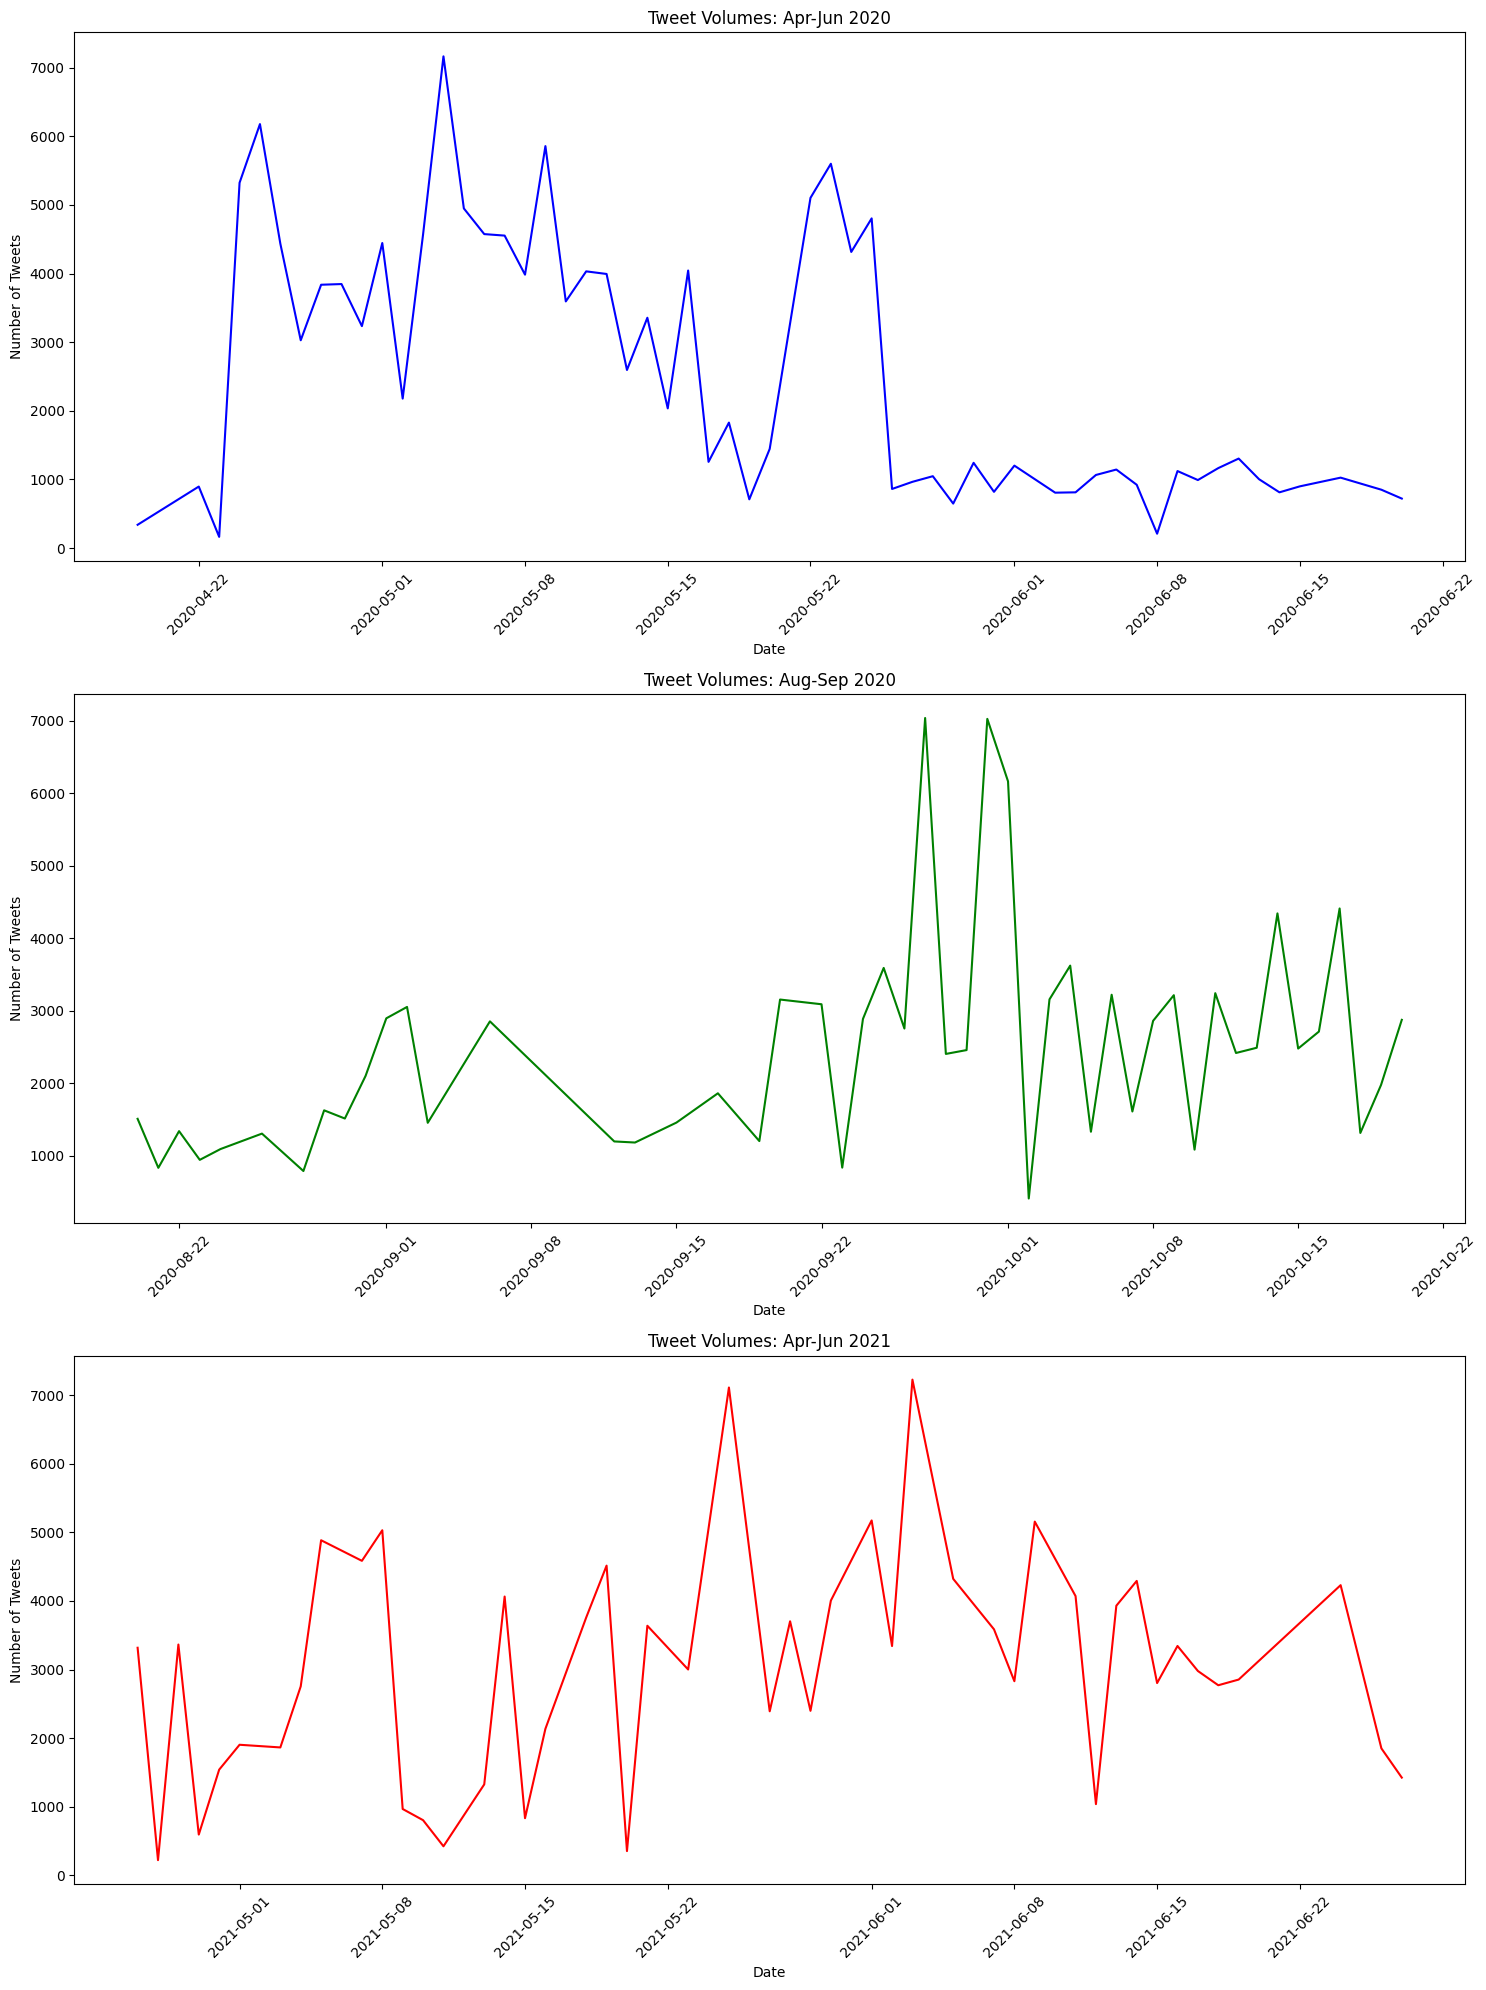

Average daily tweets (Apr-Jun 2020): 2524.60
Average daily tweets (Aug-Sep 2020): 2459.35
Average daily tweets (Apr-Jun 2021): 3072.40

Max daily tweets (Apr-Jun 2020): 7165 on 2020-05-04
Max daily tweets (Aug-Sep 2020): 7040 on 2020-09-27
Max daily tweets (Apr-Jun 2021): 7229 on 2021-06-03


In [17]:
# Create three separate plots

# Ensure dates are in correct format
for df in [df1, df2, df3]:
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['date'] = df['created_at'].dt.date

def get_daily_counts(df):
    return df['date'].value_counts().sort_index()

counts1 = get_daily_counts(df1)
counts2 = get_daily_counts(df2)
counts3 = get_daily_counts(df3)

# Create three separate plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 20))

# Plot for Apr-Jun 2020
ax1.plot(counts1.index, counts1.values, color='blue')
ax1.set_title('Tweet Volumes: Apr-Jun 2020')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Tweets')
ax1.tick_params(axis='x', rotation=45)

# Plot for Aug-Sep 2020
ax2.plot(counts2.index, counts2.values, color='green')
ax2.set_title('Tweet Volumes: Aug-Sep 2020')
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Tweets')
ax2.tick_params(axis='x', rotation=45)

# Plot for Apr-Jun 2021
ax3.plot(counts3.index, counts3.values, color='red')
ax3.set_title('Tweet Volumes: Apr-Jun 2021')
ax3.set_xlabel('Date')
ax3.set_ylabel('Number of Tweets')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Average daily tweets (Apr-Jun 2020): {counts1.mean():.2f}")
print(f"Average daily tweets (Aug-Sep 2020): {counts2.mean():.2f}")
print(f"Average daily tweets (Apr-Jun 2021): {counts3.mean():.2f}")

print(f"\nMax daily tweets (Apr-Jun 2020): {counts1.max()} on {counts1.idxmax()}")
print(f"Max daily tweets (Aug-Sep 2020): {counts2.max()} on {counts2.idxmax()}")
print(f"Max daily tweets (Apr-Jun 2021): {counts3.max()} on {counts3.idxmax()}")


A visual comparison of tweet volumes across the three periods.
Average and maximum daily tweet counts for each period.
The top 5 days with the highest tweet volumes in each period, along with the most common words used on those days.

To identify significant events or trends:

Look for spikes in the tweet volume graph. These often correspond to major events or announcements.
Pay attention to the most common words on high-volume days. These can give you clues about what was being discussed.
Compare the overall trends across the three periods. Are tweet volumes increasing or decreasing over time?
Research major COVID-19 related events that occurred during these periods and see if they align with spikes in tweet volume.

#### Some events to consider: Sephora

Apr-Jun 2020: Initial lockdowns, first wave of infections in many countries
Aug-Sep 2020: Second wave in some countries, vaccine development news
Apr-Jun 2021: Vaccine rollouts, emergence of new variants

Remember to interpret these results in the context of the pandemic's progression and major world events during these periods. The most common words and tweet volumes can give you insights into what topics were driving Twitter conversations about COVID-19 during each period.
Would you like me to explain any part of this analysis further or help you interpret the results?

##Sentiments for all dataframes

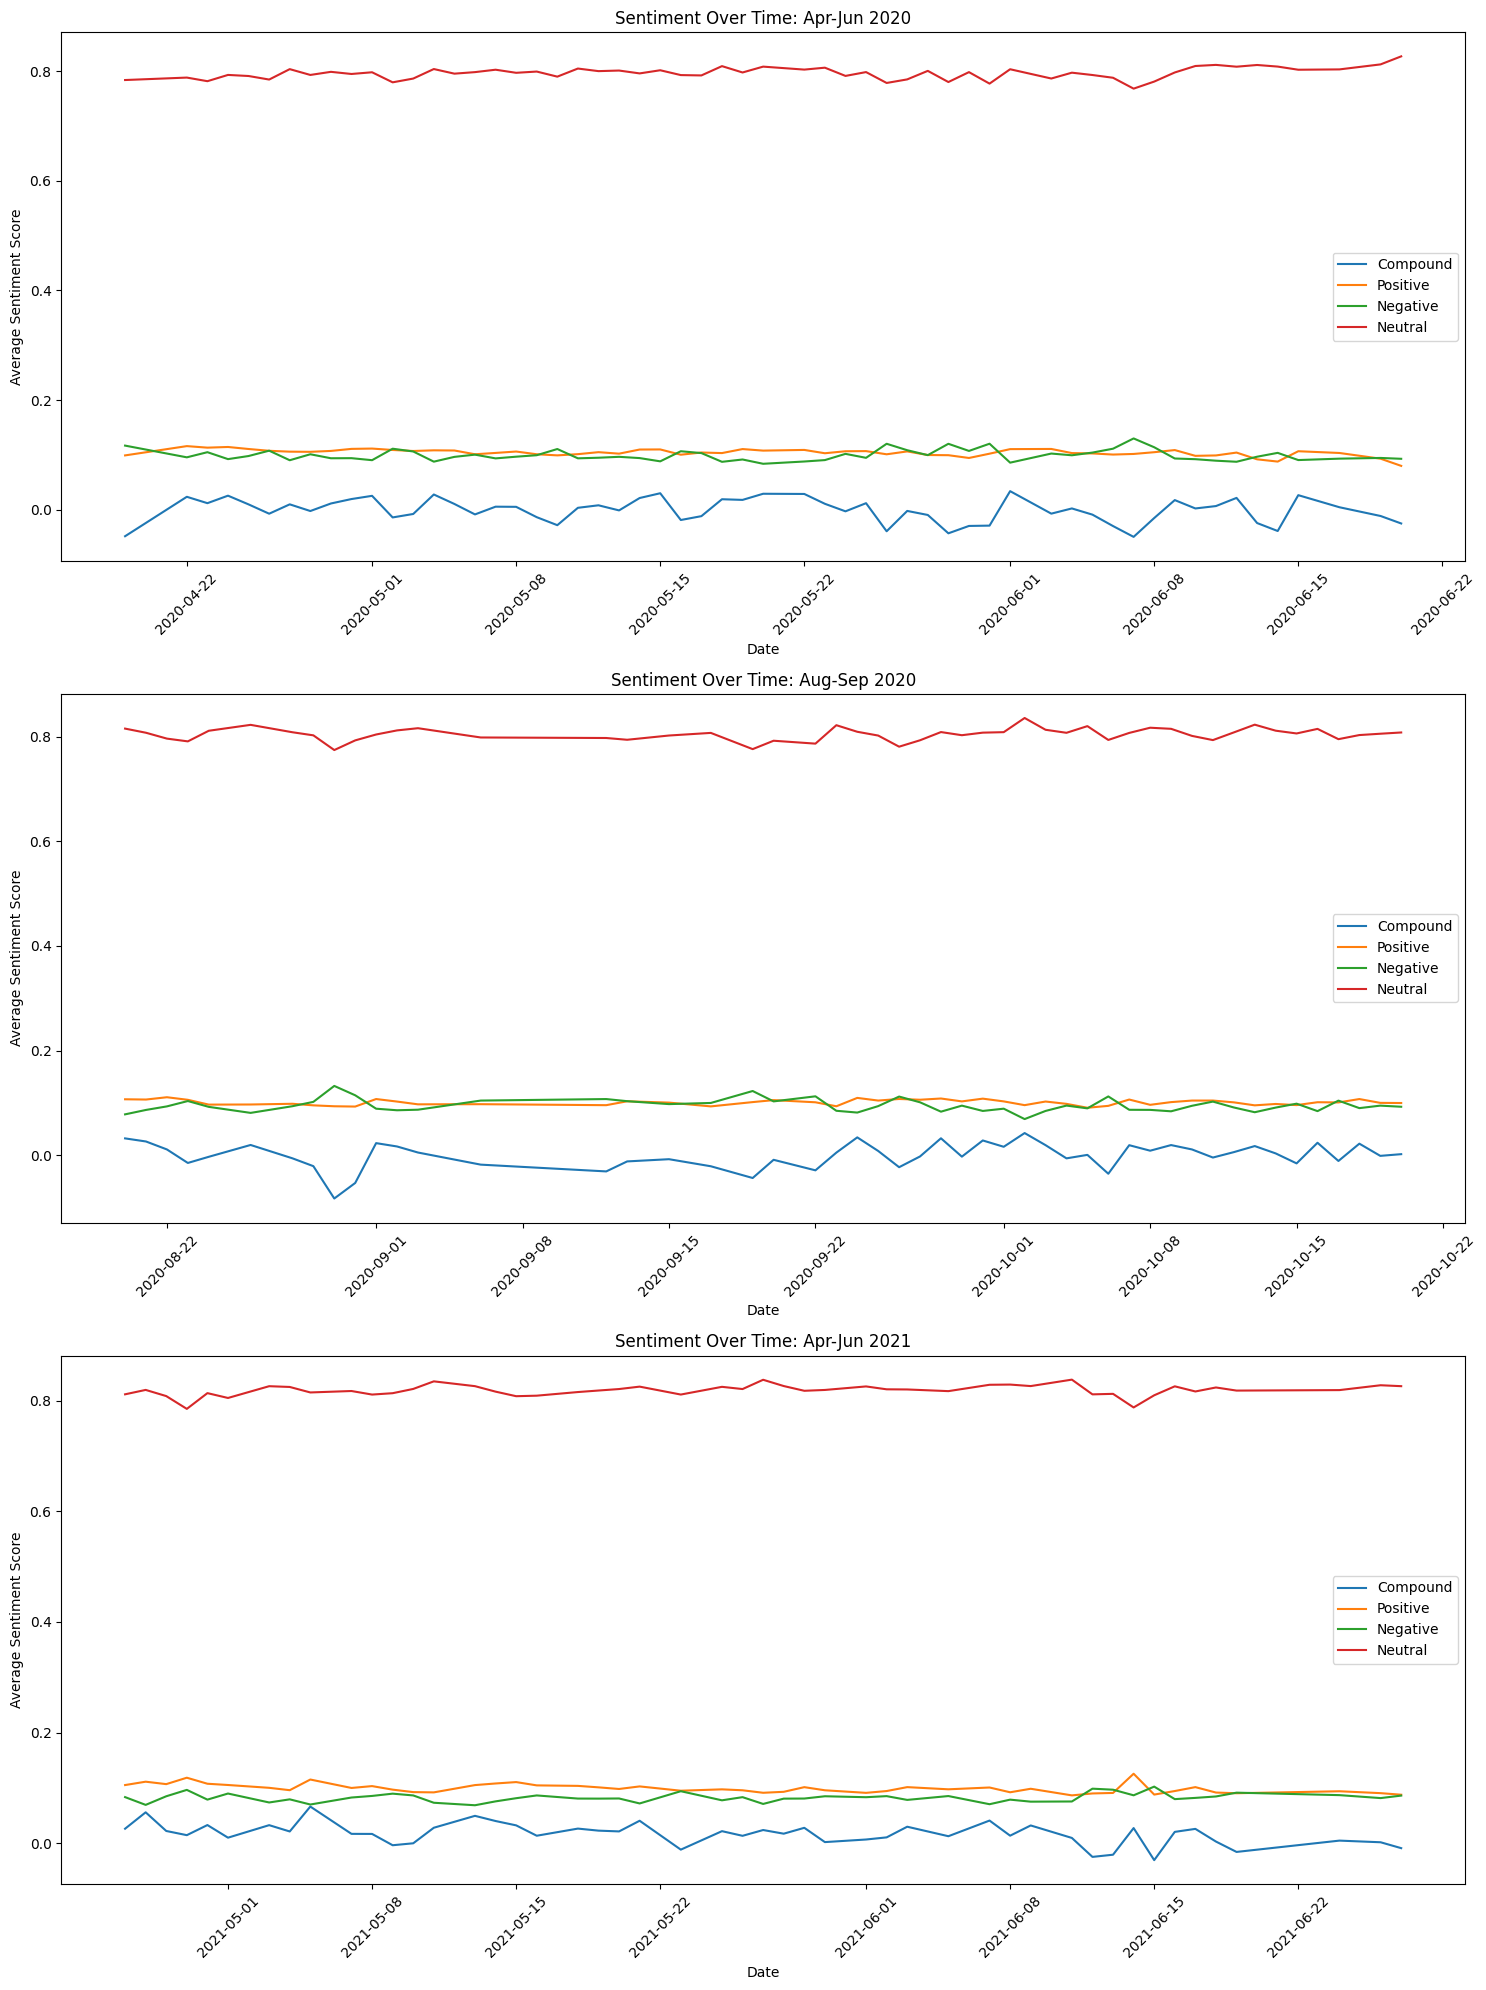


Average sentiment scores for Apr-Jun 2020:
compound   -0.000865
pos         0.104144
neg         0.099279
neu         0.796577
dtype: float64

Days with highest compound sentiment in Apr-Jun 2020:
date
2020-06-01    0.033819
2020-05-15    0.030005
2020-05-20    0.029065
2020-05-22    0.028698
2020-05-04    0.027719
Name: compound, dtype: float64

Days with lowest compound sentiment in Apr-Jun 2020:
date
2020-06-07   -0.049591
2020-04-19   -0.048420
2020-05-29   -0.043105
2020-05-26   -0.039379
2020-06-14   -0.038901
Name: compound, dtype: float64

Average sentiment scores for Aug-Sep 2020:
compound   -0.000071
pos         0.100860
neg         0.094787
neu         0.804334
dtype: float64

Days with highest compound sentiment in Aug-Sep 2020:
date
2020-10-02    0.042264
2020-09-24    0.034022
2020-09-28    0.032252
2020-08-20    0.032080
2020-09-30    0.028108
Name: compound, dtype: float64

Days with lowest compound sentiment in Aug-Sep 2020:
date
2020-08-30   -0.082793
2020-08-31   -0

In [18]:
# Function to calculate daily average sentiment
def get_daily_sentiment(df):
    return df.groupby('date')[['compound', 'pos', 'neg', 'neu']].mean()

# Calculate daily sentiment for each dataset
sentiment1 = get_daily_sentiment(df1)
sentiment2 = get_daily_sentiment(df2)
sentiment3 = get_daily_sentiment(df3)

# Create three separate plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 20))

# Plot for Apr-Jun 2020
sentiment1.plot(ax=ax1)
ax1.set_title('Sentiment Over Time: Apr-Jun 2020')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Sentiment Score')
ax1.legend(['Compound', 'Positive', 'Negative', 'Neutral'])
ax1.tick_params(axis='x', rotation=45)

# Plot for Aug-Sep 2020
sentiment2.plot(ax=ax2)
ax2.set_title('Sentiment Over Time: Aug-Sep 2020')
ax2.set_xlabel('Date')
ax2.set_ylabel('Average Sentiment Score')
ax2.legend(['Compound', 'Positive', 'Negative', 'Neutral'])
ax2.tick_params(axis='x', rotation=45)

# Plot for Apr-Jun 2021
sentiment3.plot(ax=ax3)
ax3.set_title('Sentiment Over Time: Apr-Jun 2021')
ax3.set_xlabel('Date')
ax3.set_ylabel('Average Sentiment Score')
ax3.legend(['Compound', 'Positive', 'Negative', 'Neutral'])
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
for period, sentiment in zip(['Apr-Jun 2020', 'Aug-Sep 2020', 'Apr-Jun 2021'],
                             [sentiment1, sentiment2, sentiment3]):
    print(f"\nAverage sentiment scores for {period}:")
    print(sentiment.mean())

    print(f"\nDays with highest compound sentiment in {period}:")
    print(sentiment['compound'].nlargest(5))

    print(f"\nDays with lowest compound sentiment in {period}:")
    print(sentiment['compound'].nsmallest(5))

#### Overall Sentiment Trends:

Apr-Jun 2020: Slightly negative overall (compound: -0.000865)
Aug-Sep 2020: Nearly neutral, but still slightly negative (compound: -0.000071)
Apr-Jun 2021: Positive shift (compound: 0.016916)



Insight: There's a clear positive progression in sentiment from 2020 to 2021, suggesting public mood about COVID-19 improved over time.

Neutral Sentiment Dominance:

All periods show high neutral sentiment (79-81%), with Apr-Jun 2021 having the highest (81.88%)



Insight: Most tweets were factual or neutral in tone, with a slight increase in neutrality over time, possibly indicating less emotional and more informational content.

Positive vs Negative Sentiment:

In all periods, positive sentiment slightly outweighs negative
The gap widens in Apr-Jun 2021 (9.90% positive vs 8.22% negative)



Insight: While discussions remained mostly neutral, there was a consistent slight bias towards positivity, which increased in 2021.

Sentiment Volatility:

Apr-Jun 2020: Highest compound ranges from 0.034 to -0.050
Aug-Sep 2020: Highest compound ranges from 0.042 to -0.083
Apr-Jun 2021: Highest compound ranges from 0.066 to -0.031



Insight: Sentiment became more volatile in Aug-Sep 2020 but showed higher positive peaks and less negative lows in 2021, suggesting more optimism and less severe negativity.

Specific Date Insights:

June 1, 2020 had the highest sentiment in the first period, possibly related to easing of initial lockdowns
October 2, 2020 had the highest sentiment in the second period
May 5, 2021 had the highest sentiment in the third period, possibly related to vaccine rollout progress


Negative Sentiment Peaks:

June 7, 2020 and August 30, 2020 had notably low sentiments, which might correspond to specific events or news
The lowest sentiment in 2021 (June 15) was less negative than the lowest points in 2020



## Overall Conclusions

Public sentiment about COVID-19 generally improved from 2020 to 2021.
Discussions remained largely neutral throughout, but with a consistent positive bias.
Sentiment volatility increased in late 2020 but stabilized with a more positive trend in 2021.
The most negative days in 2021 were less severe than those in 2020, suggesting a reduction in extreme negative reactions.
Specific dates with high or low sentiment peaks warrant further investigation into corresponding events or news.

These insights suggest a gradual adaptation to the pandemic situation, with public discourse becoming less negatively charged and more neutral or positive over time. The shift could be attributed to factors like vaccine rollouts, better understanding of the virus, or adaptation to new normals.

## DataFrame1 Sephora

In [19]:
#Convert 'created_at' to datetime if it's not already
df1['created_at'] = pd.to_datetime(df1['created_at'])

In [20]:
#Clean the 'source' column to extract just the app name
df1['source'] = df1['source'].str.extract('>(.*?)<')

####Distribution of sentiments

In [21]:
#Examine the distribution of sentiments
print(df1['sentiment'].value_counts(normalize=True))

sentiment
neu    0.400172
pos    0.320528
neg    0.279299
Name: proportion, dtype: float64


This data represents the proportions of different sentiment categories in a dataset, likely sentiment analysis of tweets

Insights:

Distribution: The sentiments are not evenly distributed. There's a clear prevalence of neutral sentiment, followed by positive, and then negative.

Neutral dominance: The largest proportion of the analyzed text (40.02%) was classified as neutral. This suggests that a significant portion of the content was factual, objective, or didn't express a strong opinion.

Positive bias: There's a slight positive bias in the non-neutral content. Positive sentiment (32.05%) outweighs negative sentiment (27.93%) by about 4 percentage points.

Sentiment polarity: If we consider only the positive and negative sentiments, about 53.4% of the polarized content is positive, while 46.6% is negative. This indicates a mild overall positive leaning in the opinionated content.

Balanced opinions: While there is a slight positive tilt, the difference between positive and negative sentiments isn't extremely large, suggesting a relatively balanced set of opinions.

 Depending on the subject matter, these proportions could be interpreted differently. For instance, in customer feedback, this distribution might be seen as moderately positive, while in political discourse, it might be considered fairly balanced.


These insights provide a high-level overview of the sentiment distribution in the analyzed text, showing a predominantly neutral tone with a slight positive inclination among the opinionated content.

In [22]:
#The most common hashtags
hashtags = df1['hashtags'].dropna().str.split(',').explode()
print(hashtags.value_counts().head(10))

hashtags
COVID19         3565
Covid_19        2564
 Covid_19       1490
 COVID19        1264
coronavirus      827
COVID            784
COVID__19        660
 coronavirus     658
 COVID           425
Covid19          347
Name: count, dtype: int64


####Distribution of Tweet Lengths (Graph1)

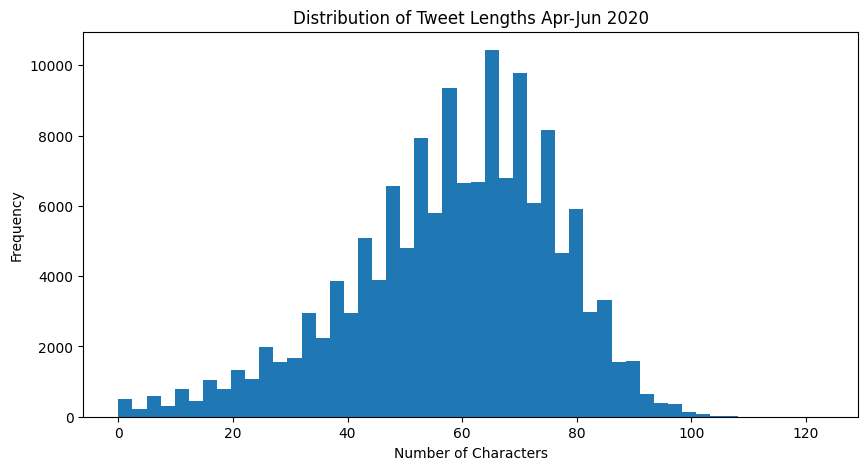

In [23]:
#Distribution of tweet lengths
df1['tweet_length'] = df1['cleaned_text'].str.len()

plt.figure(figsize=(10, 5))
plt.hist(df1['tweet_length'], bins=50)
plt.title('Distribution of Tweet Lengths Apr-Jun 2020')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

 Distribution of Tweet Lengths Apr-Jun 2020

Range: The graph shows tweet lengths from 0 to about 120 characters.
Peak: The highest frequency occurs around 60-70 characters, with over 10,000 tweets at this length.
Shape: The distribution is roughly bell-shaped but with irregular peaks and valleys, especially in the 40-80 character range.
Short tweets: There's a small spike for very short tweets (0-5 characters).
Long tweets: Frequency decreases rapidly after 80 characters, with few tweets longer than 100 characters.
Overall trend: Most tweets cluster in the 30-90 character range, with a clear preference for medium-length tweets.

In [24]:
#Frequent original authors
print(df1['original_author'].value_counts().head(10))

original_author
sumanebot          40
PulpNews           35
easyJet            26
varun18vijay       26
IAM__Network       26
dev_discourse      21
AndyVermaut        20
AnalyticaGlobal    19
eprnetwork         19
watsupafrica       19
Name: count, dtype: int64


## Correlation matrix


In [25]:
# Define variables
sentiment_vars = ['compound', 'pos', 'neg', 'neu']
engagement_vars = ['retweet_count', 'favorite_count']
text_features = ['tweet_length', 'word_count', 'hashtag_count', 'mention_count']

# Create new text feature columns
df1['tweet_length'] = df1['original_text'].str.len()
df1['word_count'] = df1['original_text'].str.split().str.len()
df1['hashtag_count'] = df1['original_text'].str.count('#')
df1['mention_count'] = df1['original_text'].str.count('@')


# Function to create and display correlation heatmap
def plot_correlation_heatmap(data, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(title)
    plt.show()

#### **Sentiment Correlation**

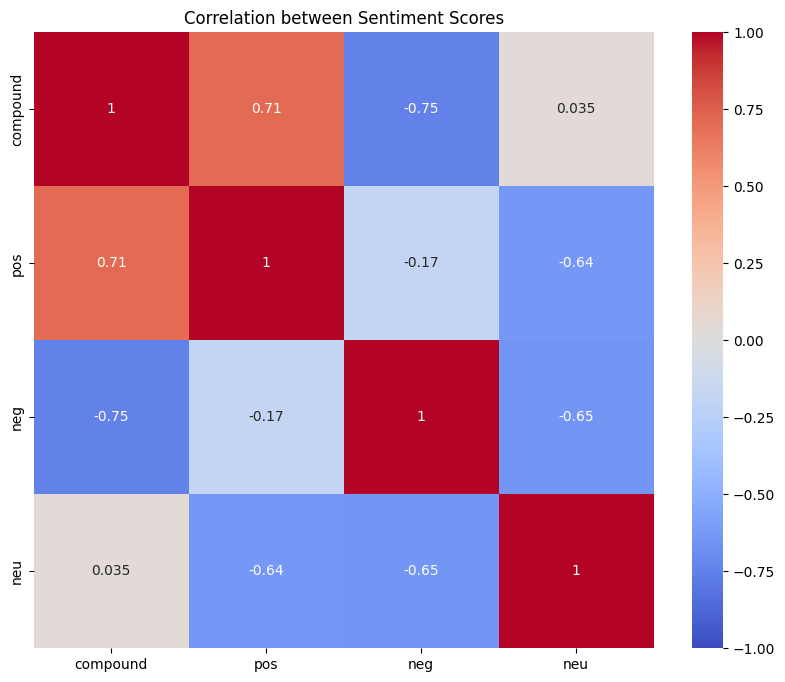

In [26]:

# Sentiment Correlation
sentiment_corr = df1[sentiment_vars].corr()
plot_correlation_heatmap(sentiment_corr, 'Correlation between Sentiment Scores')

#### **Text Feature Correlation**

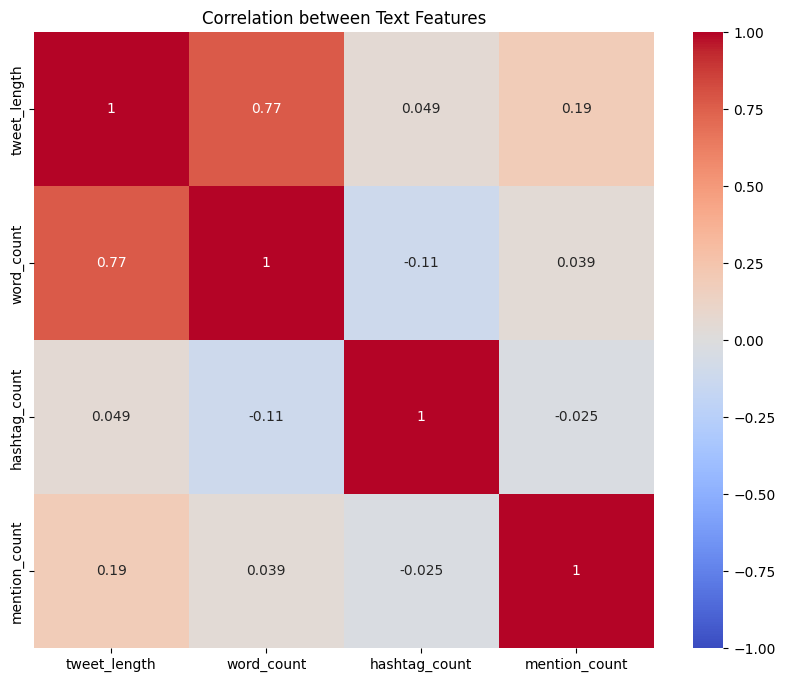

In [27]:
# Text Features Correlation
text_features_corr = df1[text_features].corr()
plot_correlation_heatmap(text_features_corr, 'Correlation between Text Features')

## Word Cloud

In [28]:
def print_top_days(counts, df, n=5):
    top_days = counts.nlargest(n)
    print(f"\nTop {n} days with highest tweet volumes:")
    for date, count in top_days.items():
        print(f"{date}: {count} tweets")
        # Check if 'cleaned_text' column exists before accessing it
        if 'cleaned_text' in df.columns:
            day_tweets = df[df['date'] == date]['cleaned_text']
            words = ' '.join(day_tweets).split()
            word_freq = pd.Series(words).value_counts()
            print(f"  Most common words: {', '.join(word_freq.head().index)}")
        else:
            print("  'cleaned_text' column not found in DataFrame.")

print("Apr-Jun 2020:")
print_top_days(counts1, df1)

print("\nAug-Sep 2020:")
print_top_days(counts2, df2)

print("\nApr-Jun 2021:")
print_top_days(counts3, df3)

Apr-Jun 2020:

Top 5 days with highest tweet volumes:
2020-05-04: 7165 tweets
  Most common words: covid, case, new, test, peopl
2020-04-25: 6178 tweets
  Most common words: covid, peopl, case, test, new
2020-05-09: 5857 tweets
  Most common words: covid, case, peopl, new, test
2020-05-23: 5600 tweets
  Most common words: covid, case, new, peopl, test
2020-04-24: 5323 tweets
  Most common words: covid, trump, new, peopl, test

Aug-Sep 2020:

Top 5 days with highest tweet volumes:
2020-09-27: 7040 tweets
  'cleaned_text' column not found in DataFrame.
2020-09-30: 7028 tweets
  'cleaned_text' column not found in DataFrame.
2020-10-01: 6166 tweets
  'cleaned_text' column not found in DataFrame.
2020-10-17: 4413 tweets
  'cleaned_text' column not found in DataFrame.
2020-10-14: 4345 tweets
  'cleaned_text' column not found in DataFrame.

Apr-Jun 2021:

Top 5 days with highest tweet volumes:
2021-06-03: 7229 tweets
  'cleaned_text' column not found in DataFrame.
2021-05-25: 7114 tweets
  'c

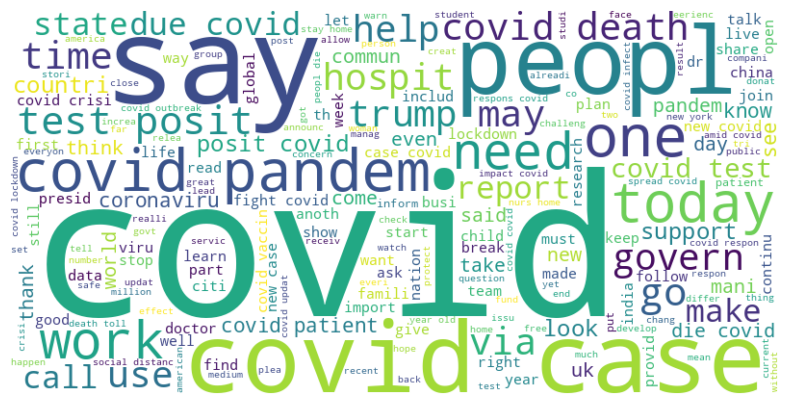

In [29]:
#Create word cloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df1['cleaned_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##Content Analysis Sephora

In [30]:
def get_top_words(text_series, n=20):
    words = ' '.join(text_series).lower().split()
    return Counter(words).most_common(n)

def get_top_bigrams(text_series, n=20):
    bigrams = []
    for text in text_series:
        words = text.lower().split()
        bigrams.extend(zip(words, words[1:]))
    return Counter(bigrams).most_common(n)

def contains_url(text):
    url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return bool(url_pattern.search(text))

def extract_domain(text):
    url_pattern = re.compile(r'https?://(?:www\.)?([a-zA-Z0-9.-]+)\.(?:[a-zA-Z]{2,})')
    match = url_pattern.search(text)
    return match.group(1) if match else None

##Most Frequent Words

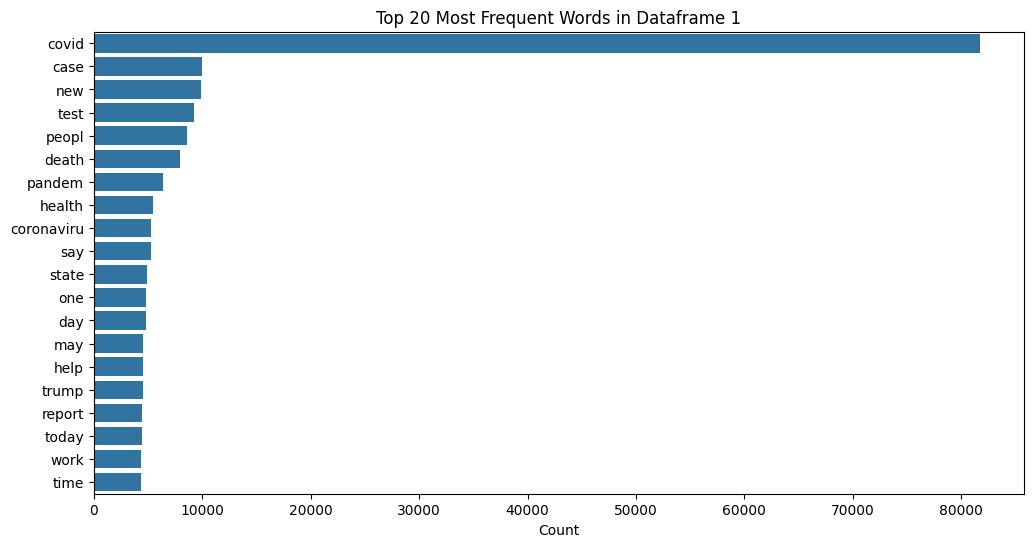

In [31]:
#Analyze and visualize top words
top_words = get_top_words(df1['cleaned_text'])

plt.figure(figsize=(12, 6))
words, counts = zip(*top_words)
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Most Frequent Words in Dataframe 1')
plt.xlabel('Count')
plt.show()

##Bigrams

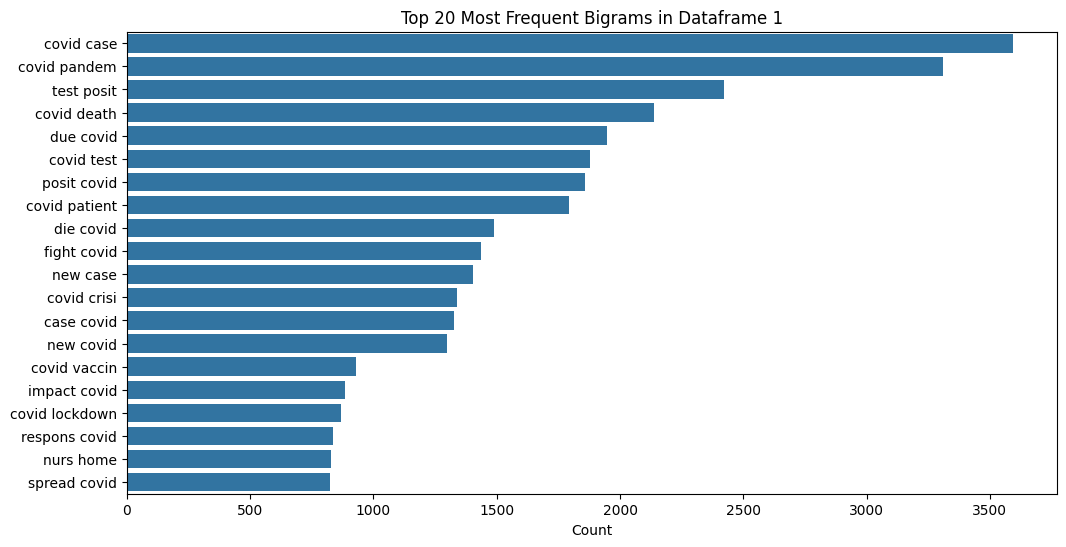

In [32]:
#Analyze and visulaize top bigrams
top_bigrams = get_top_bigrams(df1['cleaned_text'])

plt.figure(figsize=(12, 6))
bigrams, counts = zip(*top_bigrams)
sns.barplot(x=list(counts), y=[' '.join(bigram) for bigram in bigrams])
plt.title('Top 20 Most Frequent Bigrams in Dataframe 1')
plt.xlabel('Count')
plt.show()

## Temporal Analysis Sephora

In [33]:
#Preparing the data to ensure all dates are in the correct format
# Convert 'created_at' to datetime for all dataframes
for df in [df1, df2, df3]:
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['date'] = df['created_at'].dt.date

# Create a function to get daily tweet counts
def get_daily_counts(df):
    return df['date'].value_counts().sort_index()

# Get daily counts for each dataframe
counts1 = get_daily_counts(df1)
counts2 = get_daily_counts(df2)
counts3 = get_daily_counts(df3)

In [34]:
def print_top_days(counts, df, n=5):
    top_days = counts.nlargest(n)
    print(f"\nTop {n} days with highest tweet volumes:")
    for date, count in top_days.items():
        print(f"{date}: {count} tweets")
        # Get the most common words for this day
        day_tweets = df[df['date'] == date]['cleaned_text']
        words = ' '.join(day_tweets).split()
        word_freq = pd.Series(words).value_counts()
        print(f"  Most common words: {', '.join(word_freq.head().index)}")

print("Apr-Jun 2020:")
print_top_days(counts1, df1)

#Took off DF2 and DF3


Apr-Jun 2020:

Top 5 days with highest tweet volumes:
2020-05-04: 7165 tweets
  Most common words: covid, case, new, test, peopl
2020-04-25: 6178 tweets
  Most common words: covid, peopl, case, test, new
2020-05-09: 5857 tweets
  Most common words: covid, case, peopl, new, test
2020-05-23: 5600 tweets
  Most common words: covid, case, new, peopl, test
2020-04-24: 5323 tweets
  Most common words: covid, trump, new, peopl, test


##Emoji Usage Analysis Sephora


In [35]:
df1.columns

Index(['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'hashtags', 'user_mentions',
       'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment',
       'cleaned_text', 'original_length', 'cleaned_length', 'date',
       'tweet_length', 'word_count', 'hashtag_count', 'mention_count'],
      dtype='object')

In [36]:
def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.UNICODE_EMOJI['en'])


#'df1' is the dataframe you want to use
top_emojis = df1['clean_tweet'].value_counts().head(10)  # Get the top 10 emojis


#View Top emojis
print("Top Emojis:")
for emoji in top_emojis.index: # Iterate over the index (emojis)
    count = top_emojis[emoji]  # Get the count for each emoji
    print(f"{emoji}: {count}")

Top Emojis:
covid19: 260
lifepetit petit cultur life: 29
governor whitmer sent covid19 patient across state region hub spread viru kept patient: 24
covid19 updat: 24
thank sir appreci warrior pleas lead help implement: 22
updat: 19
use help track fight covid19 new user hwf donat meal: 18
colorado amend coronaviru death count say fewer die covid19 previous report: 15
young middl age peopl bare sick covid19 die stroke: 15
latest worldwid covid19 data case death fatal rate: 14


In [37]:
#Define Helper Functions
def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)

def get_emoji_name(emoji_char):
    return emoji.EMOJI_DATA[emoji_char]['en']

In [38]:
#Define Helper Functions
def extract_emojis(text):
    if isinstance(text, str): # Check if text is a string
        return ''.join(c for c in text if c in emoji.EMOJI_DATA)
    else:
        return '' # Return an empty string if not a string

def get_emoji_name(emoji_char):
    return emoji.EMOJI_DATA[emoji_char]['en']

In [39]:

#Check the emoji collumn
print("\nSample of 'emojis' column:")
print(df1['clean_tweet'].head())
print(f"\nNumber of tweets with emojis: {df1['clean_tweet'].str.len().gt(0).sum()}")


Sample of 'emojis' column:
0    call leader help protect refuge covid19 provid...
1    ogun state support cbn nirsal covid19 target c...
2    polic offici base namahadi polic station busi ...
3                     covid19 oyo discharg two patient
4                                 condol famili surviv
Name: clean_tweet, dtype: object

Number of tweets with emojis: 143419


In [40]:
#Verify Compound sentiment scores
print("\nSample of 'compound' sentiment scores:")
print(df1['compound'].head())
print(f"\nSentiment score range: {df1['compound'].min()} to {df1['compound'].max()}")


Sample of 'compound' sentiment scores:
0    0.8176
1    0.6486
2    0.2732
3    0.0000
4    0.0000
Name: compound, dtype: float64

Sentiment score range: -0.9901 to 0.9612


In [41]:
import emoji

def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.distinct_emoji_list(text))  # Use distinct_emoji_list to get a list of emojis in the text

print("\nSample of original texts with emojis:")
emoji_texts = df1[df1['clean_tweet'].str.len() > 0]['original_text'].head()
for text in emoji_texts:
    print(text)
    print(f"Extracted emojis: {extract_emojis(text)}")
    print()  # This line is corrected to properly close the print statement


Sample of original texts with emojis:
RT @GlblCtzn: .@priyankachopra is calling on leaders to help protect refugees from COVID-19 by providing them with quality health care and…
Extracted emojis: 

RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-NIRSAL COVID-19 TARGETED CREDIT FACILITY - TCF https://t.co/koWBQECoQq
Extracted emojis: 

RT @AdvoBarryRoux: These 5 police officials based at Namahadi police station were busy drinking liquor at a certain tavern whilst on duty,…
Extracted emojis: 

RT @MobilePunch: COVID-19: Oyo discharges two patients
https://t.co/eQRE00ZiJo
Extracted emojis: 

My Condolences to the Family of those who did not survive #Covid_19!
Extracted emojis: 



In [42]:
print(type(emoji))
print(emoji)

<class 'module'>
<module 'emoji' from '/usr/local/lib/python3.10/dist-packages/emoji/__init__.py'>


In [43]:
!pip install emoji --upgrade

In [44]:
import emoji
print(emoji.__version__)
print(type(emoji))

2.12.1
<class 'module'>


In [45]:
def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)

# Test the function
test_text = "Hello! 😊 How are you? 🌍"
print(extract_emojis(test_text))

😊🌍


In [46]:
print(df1['original_text'].dtype)
print(df1['original_text'].isnull().sum())
print(df1['original_text'].head())

object
1
0    RT @GlblCtzn: .@priyankachopra is calling on l...
1    RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-...
2    RT @AdvoBarryRoux: These 5 police officials ba...
3    RT @MobilePunch: COVID-19: Oyo discharges two ...
4    My Condolences to the Family of those who did ...
Name: original_text, dtype: object


In [47]:
#Top 10 emojis

def extract_emojis(text):
    if isinstance(text, str):
        try:
            return ''.join(c for c in text if c in emoji.EMOJI_DATA)
        except Exception as e:
            print(f"Error processing text: {text[:50]}... Error: {str(e)}")
    return ''

# Apply the function to create a new column with just emojis
df1['emojis'] = df1['original_text'].apply(extract_emojis)

# Count all emojis
all_emojis = ''.join(df1['emojis'].dropna())
emoji_counts = pd.Series(list(all_emojis)).value_counts()

print("Top Emojis:")
print(emoji_counts.head(10))
print(f"\nTotal number of emojis found: {len(all_emojis)}")
print(f"Number of tweets with emojis: {df1['emojis'].str.len().gt(0).sum()}")

Top Emojis:
😂    726
🙏    443
👇    441
🚨    438
🤣    324
👏    292
😭    285
❤    275
👉    259
➡    252
Name: count, dtype: int64

Total number of emojis found: 14731
Number of tweets with emojis: 7204


In [48]:
#Percentage of used emojis
total_tweets = len(df1)
emoji_percentage = (7204 / total_tweets) * 100
print(f"Percentage of tweets containing emojis: {emoji_percentage:.2f}%")

Percentage of tweets containing emojis: 5.01%


In [49]:
#Average number of emojis per tweets
avg_emojis_per_tweet = 14731 / 7204
print(f"Average number of emojis per tweet (in tweets with emojis): {avg_emojis_per_tweet:.2f}")

Average number of emojis per tweet (in tweets with emojis): 2.04


In [50]:
emoji_char = "😂"
print(get_emoji_name(emoji_char))  # Output: "face with tears of joy"

:face_with_tears_of_joy:


<ipython-input-51-5d99ea3a98b2>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_emojis.values,


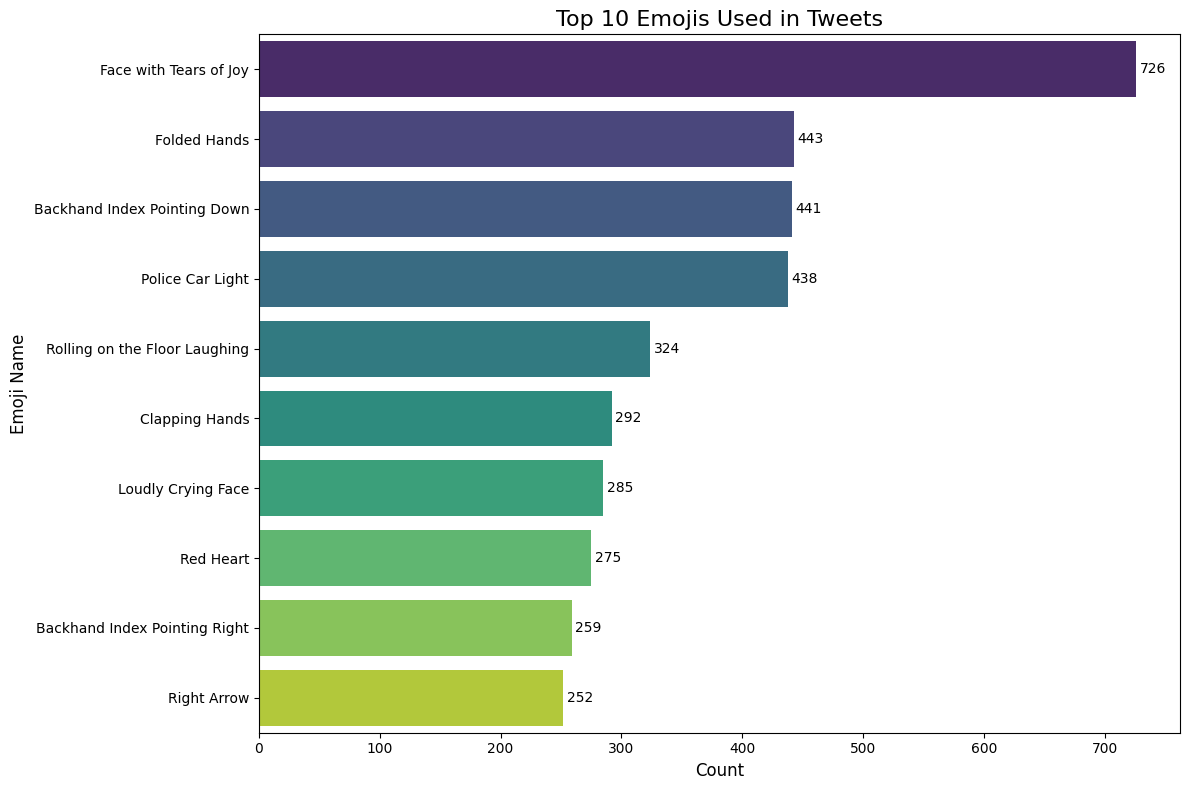

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

def simple_emoji_name(emoji_char):
    emoji_names = {
        '😂': 'Face with Tears of Joy',
        '🙏': 'Folded Hands',
        '👇': 'Backhand Index Pointing Down',
        '🚨': 'Police Car Light',
        '🤣': 'Rolling on the Floor Laughing',
        '👏': 'Clapping Hands',
        '😭': 'Loudly Crying Face',
        '❤': 'Red Heart',
        '👉': 'Backhand Index Pointing Right',
        '➡': 'Right Arrow'
    }
    return emoji_names.get(emoji_char, 'Unknown Emoji')

# Assuming emoji_counts is your Series of emoji counts
top_n = 10
top_emojis = emoji_counts.head(top_n)

plt.figure(figsize=(12, 8))  # Increased height for better readability
sns.barplot(x=top_emojis.values,
            y=[simple_emoji_name(emoji) for emoji in top_emojis.index],
            palette="viridis")

plt.title('Top 10 Emojis Used in Tweets', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Emoji Name', fontsize=12)

# Add value labels to the end of each bar
for i, v in enumerate(top_emojis.values):
    plt.text(v + 3, i, str(v), va='center')

# Adjust layout to prevent cutoff
plt.tight_layout()

plt.show()

In [52]:
#Analyze emoji presence and sentiment
df1['has_emoji'] = df1['emojis'].apply(lambda x: len(x) > 0)

sentiment_with_emoji = df1[df1['has_emoji']]['compound'].mean()
sentiment_without_emoji = df1[~df1['has_emoji']]['compound'].mean()

print(f"Average sentiment with emojis: {sentiment_with_emoji:.4f}")
print(f"Average sentiment without emojis: {sentiment_without_emoji:.4f}")

Average sentiment with emojis: 0.0674
Average sentiment without emojis: 0.0012


#### **Sentiment Distribution**

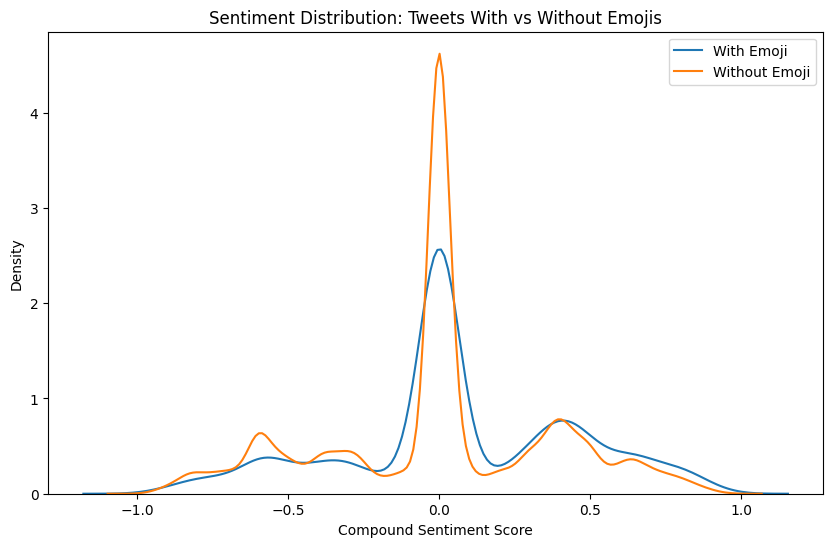

In [53]:
#Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(df1[df1['has_emoji']]['compound'], label='With Emoji')
sns.kdeplot(df1[~df1['has_emoji']]['compound'], label='Without Emoji')
plt.title('Sentiment Distribution: Tweets With vs Without Emojis')
plt.xlabel('Compound Sentiment Score')
plt.legend()
plt.show()

#### **Conclusion**
This graph is showing the sentiment distribution of tweets with and without emojis. The x-axis represents the compound sentiment score ranging from -1 to 1, while the y-axis shows the density of tweets at each sentiment score. The blue line represents tweets with emojis, and the orange line represents tweets without emojis.

The graph provides a visual comparison of how sentiment is distributed in tweets depending on whether they contain emojis or not. Some notable observations:

1. Both distributions peak around a sentiment score of 0, indicating a large number of neutral tweets.
2. The distribution for tweets without emojis (orange) has a higher peak at the neutral point.
3. Tweets with emojis (blue) seem to have a slightly wider distribution, especially in the positive sentiment range.
4. There are smaller peaks on both sides of the neutral point, suggesting clusters of mildly positive and negative sentiments.

This visualization allows for a quick comparison of sentiment patterns between tweets with and without emojis, which could be useful for analyzing the impact of emoji usage on perceived tweet sentiment.

In [54]:
#Correlation between emoji count and sentiment
df1['emoji_count'] = df1['emojis'].apply(len)
correlation = df1['emoji_count'].corr(df1['compound'])
print(f"Correlation between emoji count and sentiment: {correlation:.4f}")

Correlation between emoji count and sentiment: 0.0251


# DataFrame 2

In [55]:
import re
import emoji

def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)


print("\nSample of original texts with emojis:")
emoji_texts = df1[df1['clean_tweet'].str.len() > 0]['original_text'].head()
for text in emoji_texts:
    print(text)
    print(f"Extracted emojis: {extract_emojis(text)}")
    print()


Sample of original texts with emojis:
RT @GlblCtzn: .@priyankachopra is calling on leaders to help protect refugees from COVID-19 by providing them with quality health care and…
Extracted emojis: 

RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-NIRSAL COVID-19 TARGETED CREDIT FACILITY - TCF https://t.co/koWBQECoQq
Extracted emojis: 

RT @AdvoBarryRoux: These 5 police officials based at Namahadi police station were busy drinking liquor at a certain tavern whilst on duty,…
Extracted emojis: 

RT @MobilePunch: COVID-19: Oyo discharges two patients
https://t.co/eQRE00ZiJo
Extracted emojis: 

My Condolences to the Family of those who did not survive #Covid_19!
Extracted emojis: 



In [56]:
#Check the missing values
print("\nMissing values in Dataframe 2:")
print(df2.isnull().sum())


Missing values in Dataframe 2:
id                     2
created_at             1
source               273
original_text          1
lang                   1
favorite_count         1
retweet_count          1
original_author        1
hashtags           89663
user_mentions      33271
place              34411
clean_tweet          540
compound               0
neg                    0
neu                    0
pos                    0
sentiment              0
date                   1
dtype: int64


In [57]:
#Display the first few rows
print("\nFirst few rows of Dataframe 2:")
print(df2.head())


First few rows of Dataframe 2:
             id created_at                                             source  \
0  1.300000e+18 2020-08-20  <a href="http://twitter.com/download/android" ...   
1  1.300000e+18 2020-08-20  <a href="http://twitter.com/download/android" ...   
2  1.300000e+18 2020-08-20  <a href="http://twitter.com/download/android" ...   
3  1.300000e+18 2020-08-20  <a href="https://about.twitter.com/products/tw...   
4  1.300000e+18 2020-08-20  <a href="http://twitter.com/download/android" ...   

                                       original_text lang  favorite_count  \
0  RT @RobertAlai: 91-year-old Ex-Vice President ...   en             0.0   
1  RT @cnnphilippines: BREAKING: The Department o...   en             0.0   
2  RT @latestly: #SidharthShukla Helps Out Fan Wh...   en             0.0   
3  Lending Club loan originations down 90% ... bu...   en             0.0   
4  RT @OpIndia_com: Curious case of ‘United Natio...   en             0.0   

   retweet_count o

In [58]:
#Get the basic statistic for numerical columns
print("\nBasic statistics of Dataframe 2:")
print(df2.describe())


Basic statistics of Dataframe 2:
                 id                     created_at  favorite_count  \
count  1.205070e+05                         120508   120508.000000   
mean   1.310310e+18  2020-09-26 14:15:59.059979264        0.195821   
min    1.300000e+18            2020-08-20 00:00:00        0.000000   
25%    1.310000e+18            2020-09-19 00:00:00        0.000000   
50%    1.310000e+18            2020-09-30 00:00:00        0.000000   
75%    1.310000e+18            2020-10-09 00:00:00        0.000000   
max    1.320000e+18            2020-10-20 00:00:00      554.000000   
std    6.613978e+15                            NaN        3.755947   

       retweet_count       compound            neg            neu  \
count  120508.000000  120509.000000  120509.000000  120509.000000   
mean     2559.290246       0.001445       0.094779       0.803579   
min         0.000000      -0.992500       0.000000       0.000000   
25%         1.000000      -0.153100       0.000000       0.

In [59]:
#check the datarange
# Convert 'created_at' to datetime objects if it's not already
df2['created_at'] = pd.to_datetime(df2['created_at'])

# Now try to find the date range
print(f"\nDate range: from {df2['created_at'].min()} to {df2['created_at'].max()}")


Date range: from 2020-08-20 00:00:00 to 2020-10-20 00:00:00


In [60]:
#look at the distribution sentiment
print("\nSentiment distribution:")
print(df2['sentiment'].value_counts(normalize=True))


Sentiment distribution:
sentiment
neu    0.423155
pos    0.302708
neg    0.274137
Name: proportion, dtype: float64


In [61]:
#Examine the most common hashtags
hashtags = df2['hashtags'].dropna().str.split(',').explode()
print("\nTop 10 hashtags:")
print(hashtags.value_counts().head(10))


Top 10 hashtags:
hashtags
COVID19         2871
coronavirus     2608
 COVID19        1649
 coronavirus    1551
COVID           1449
Coronavirus      742
Covid            709
 COVID           676
Covid_19         634
 StaySafe        533
Name: count, dtype: int64


##Data Cleaning

In [62]:
#clean the data
import re

def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+', '', text)  # remove URLs
        text = re.sub(r'@\w+', '', text)     # remove mentions
        text = re.sub(r'#\w+', '', text)     # remove hashtags
        text = re.sub(r'\d+', '', text)      # remove numbers
        text = re.sub(r'\s+', ' ', text)     # remove extra whitespace
        return text.strip().lower()
    else:
        return ""

df2['cleaned_text'] = df2['clean_tweet'].apply(clean_text)

print("\nSample of cleaned text:")
print(df2[['clean_tweet', 'cleaned_text']].head())


Sample of cleaned text:
                                         clean_tweet  \
0  year old ex vice presid moodi awori land inter...   
1  break depart health report peopl caught covid1...   
2  help fan request help arrang bed posit father ...   
3                     lend club loan origin hey bank   
4  curiou case unit nation ngo appreci kingdom ma...   

                                        cleaned_text  
0  year old ex vice presid moodi awori land inter...  
1  break depart health report peopl caught covid ...  
2  help fan request help arrang bed posit father ...  
3                     lend club loan origin hey bank  
4  curiou case unit nation ngo appreci kingdom ma...  


In [63]:
print("Summary statistics for Dataframe 2:")
print(df2.describe())

Summary statistics for Dataframe 2:
                 id                     created_at  favorite_count  \
count  1.205070e+05                         120508   120508.000000   
mean   1.310310e+18  2020-09-26 14:15:59.059979264        0.195821   
min    1.300000e+18            2020-08-20 00:00:00        0.000000   
25%    1.310000e+18            2020-09-19 00:00:00        0.000000   
50%    1.310000e+18            2020-09-30 00:00:00        0.000000   
75%    1.310000e+18            2020-10-09 00:00:00        0.000000   
max    1.320000e+18            2020-10-20 00:00:00      554.000000   
std    6.613978e+15                            NaN        3.755947   

       retweet_count       compound            neg            neu  \
count  120508.000000  120509.000000  120509.000000  120509.000000   
mean     2559.290246       0.001445       0.094779       0.803579   
min         0.000000      -0.992500       0.000000       0.000000   
25%         1.000000      -0.153100       0.000000       

##Correlation Matrix

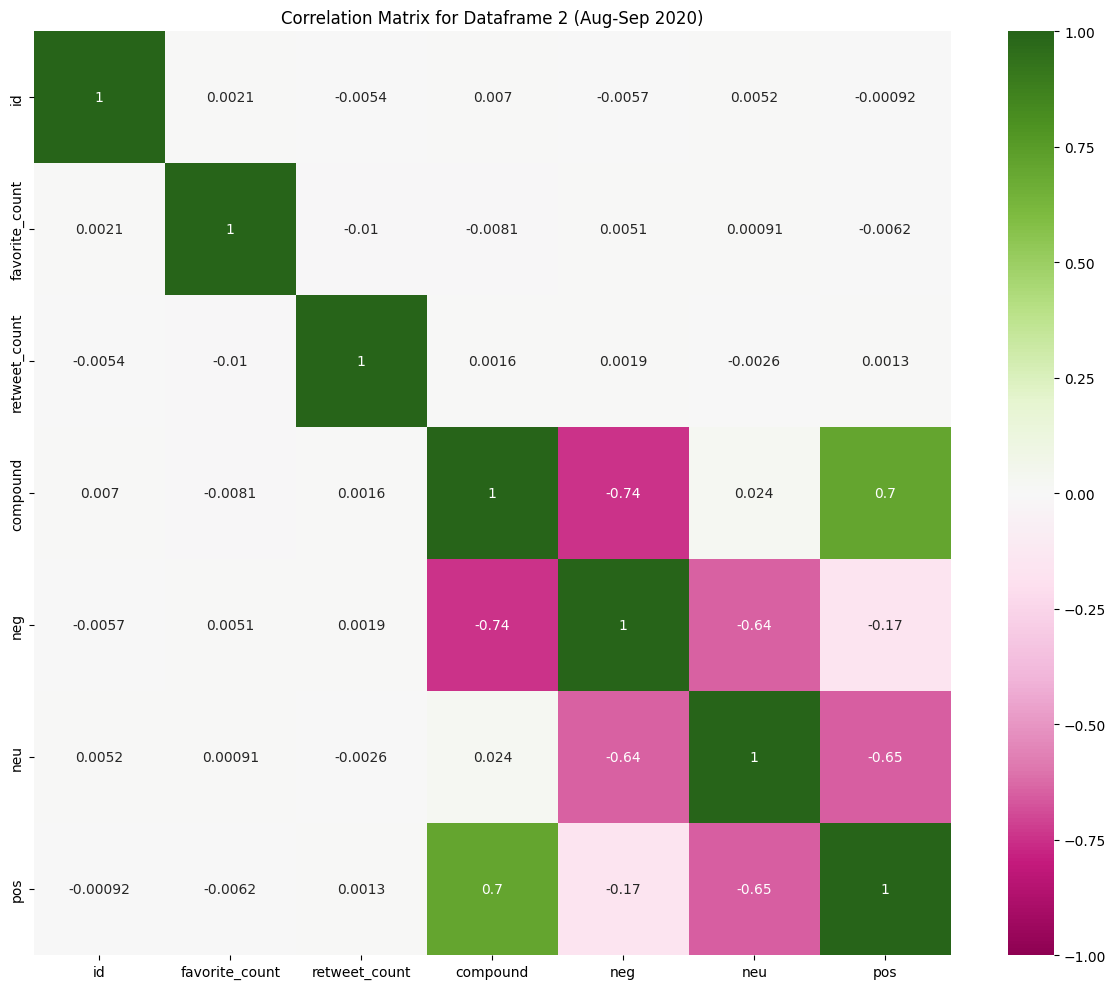

                      id  favorite_count  retweet_count  compound       neg  \
id              1.000000        0.002074      -0.005352  0.006977 -0.005712   
favorite_count  0.002074        1.000000      -0.010295 -0.008125  0.005074   
retweet_count  -0.005352       -0.010295       1.000000  0.001590  0.001880   
compound        0.006977       -0.008125       0.001590  1.000000 -0.742830   
neg            -0.005712        0.005074       0.001880 -0.742830  1.000000   
neu             0.005175        0.000912      -0.002625  0.024171 -0.640804   
pos            -0.000922       -0.006178       0.001333  0.703403 -0.165075   

                     neu       pos  
id              0.005175 -0.000922  
favorite_count  0.000912 -0.006178  
retweet_count  -0.002625  0.001333  
compound        0.024171  0.703403  
neg            -0.640804 -0.165075  
neu             1.000000 -0.651005  
pos            -0.651005  1.000000  


In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select numerical columns
numeric_columns = df2.select_dtypes(include=[np.number]).columns

# Create correlation matrix
correlation_matrix = df2[numeric_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix for Dataframe 2 (Aug-Sep 2020)')
plt.tight_layout()
plt.show()

# Print the correlation matrix
print(correlation_matrix)

##Cloud Word

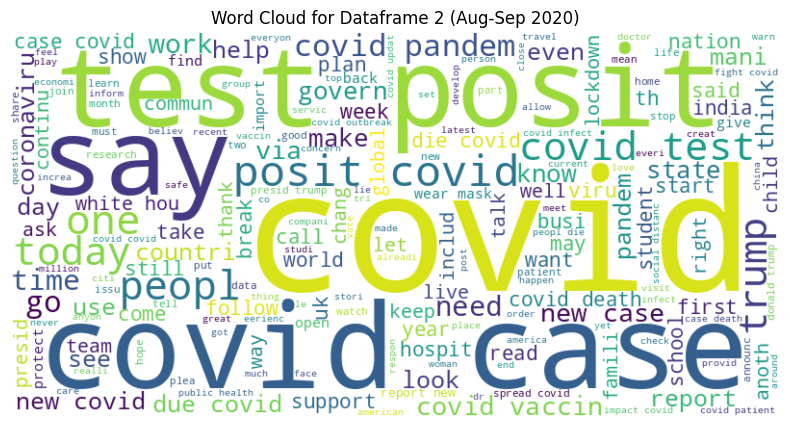

In [65]:
#Cloudword
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned text
text = ' '.join(df2['cleaned_text'].dropna())

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Dataframe 2 (Aug-Sep 2020)')
plt.show()

##Michael's Part

Some insights into comparing the two data frames, several key differences emerge that highlight the variance in the volume of tweets each contains.
DataFrame 1 (df1):
•	This data frame comprises a total of 143,903 tweets. The large number of tweets suggests a substantial dataset that could provide a broad and potentially more comprehensive analysis of the topics or sentiments captured within these tweets. This larger volume can be particularly advantageous for tasks requiring extensive data, such as training machine learning models, identifying trends, or conducting sentiment analysis across a wide sample.
DataFrame 2 (df2):
•	In contrast, DataFrame 2 contains 120,509 tweets. While still a significant amount, it is notably smaller than DataFrame 1 by 23,394 tweets. This reduction in the number of tweets may imply a more focused or filtered dataset. This could be beneficial in contexts where more precise or high-quality data is needed, or where the data has been pre-processed to remove noise and irrelevant information.
In contrast:
•	The primary difference between the two data frames is the quantity of tweets they hold. DataFrame 1 exceeds DataFrame 2 by 23,394 tweets, which is a considerable margin.
•	The larger dataset in DataFrame 1 might be preferable for analyses requiring large amounts of data to ensure statistical significance and robustness. Meanwhile, DataFrame 2, with its smaller size, could be more manageable and might reflect a curated set of data for more specific analyses.
Overall, the choice between using DataFrame 1 or DataFrame 2 would depend on the specific needs of the analysis. If comprehensive coverage and volume are critical, DataFrame 1 would be the optimal choice. Conversely, if a more refined and potentially higher-quality dataset is needed, DataFrame 2 would be more suitable.


In [66]:
#Compare DF1 to DF2
print("\nComparison with Dataframe 1:")
print(f"Number of tweets in df1: {len(df1)}")
print(f"Number of tweets in df2: {len(df2)}")
print(f"Number of common columns: {len(set(df1.columns) & set(df2.columns))}")


Comparison with Dataframe 1:
Number of tweets in df1: 143903
Number of tweets in df2: 120509
Number of common columns: 19


In [67]:
# Assuming df2 is already defined and contains your data
print("Dataframe 2 (Aug-Sep 2020) structure:")
print(df2.info())

Dataframe 2 (Aug-Sep 2020) structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120509 entries, 0 to 120508
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               120507 non-null  float64       
 1   created_at       120508 non-null  datetime64[ns]
 2   source           120236 non-null  object        
 3   original_text    120508 non-null  object        
 4   lang             120508 non-null  object        
 5   favorite_count   120508 non-null  float64       
 6   retweet_count    120508 non-null  float64       
 7   original_author  120508 non-null  object        
 8   hashtags         30846 non-null   object        
 9   user_mentions    87238 non-null   object        
 10  place            86098 non-null   object        
 11  clean_tweet      119969 non-null  object        
 12  compound         120509 non-null  float64       
 13  neg              120509 non-null  fl

In [68]:
print("First few rows of Dataframe 2:")
print(df2.head())

First few rows of Dataframe 2:
             id created_at                                             source  \
0  1.300000e+18 2020-08-20  <a href="http://twitter.com/download/android" ...   
1  1.300000e+18 2020-08-20  <a href="http://twitter.com/download/android" ...   
2  1.300000e+18 2020-08-20  <a href="http://twitter.com/download/android" ...   
3  1.300000e+18 2020-08-20  <a href="https://about.twitter.com/products/tw...   
4  1.300000e+18 2020-08-20  <a href="http://twitter.com/download/android" ...   

                                       original_text lang  favorite_count  \
0  RT @RobertAlai: 91-year-old Ex-Vice President ...   en             0.0   
1  RT @cnnphilippines: BREAKING: The Department o...   en             0.0   
2  RT @latestly: #SidharthShukla Helps Out Fan Wh...   en             0.0   
3  Lending Club loan originations down 90% ... bu...   en             0.0   
4  RT @OpIndia_com: Curious case of ‘United Natio...   en             0.0   

   retweet_count or

In [69]:
print("Missing values in Dataframe 2:")
print(df2.isnull().sum())

Missing values in Dataframe 2:
id                     2
created_at             1
source               273
original_text          1
lang                   1
favorite_count         1
retweet_count          1
original_author        1
hashtags           89663
user_mentions      33271
place              34411
clean_tweet          540
compound               0
neg                    0
neu                    0
pos                    0
sentiment              0
date                   1
cleaned_text           0
dtype: int64


In [70]:
print("Column names and data types in Dataframe 2:")
print(df2.dtypes)

Column names and data types in Dataframe 2:
id                        float64
created_at         datetime64[ns]
source                     object
original_text              object
lang                       object
favorite_count            float64
retweet_count             float64
original_author            object
hashtags                   object
user_mentions              object
place                      object
clean_tweet                object
compound                  float64
neg                       float64
neu                       float64
pos                       float64
sentiment                  object
date                       object
cleaned_text               object
dtype: object


In [71]:
print("Number of unique values in each column of Dataframe 2:")
print(df2.nunique())

Number of unique values in each column of Dataframe 2:
id                      3
created_at             49
source               1475
original_text      120508
lang                    1
favorite_count        102
retweet_count       12707
original_author    101666
hashtags            17374
user_mentions       54437
place               29575
clean_tweet        113656
compound              659
neg                   723
neu                   774
pos                   753
sentiment               3
date                   49
cleaned_text       113497
dtype: int64


In [72]:
# Define the raw tweet text
original_text = """
Raw tweet text represents the unaltered content as it was posted by the user on Twitter.
This includes all the original characters, hashtags, mentions, and links.
"""

# Define the cleaned tweet text
clean_tweet = """
Cleaned version of tweet text is the original text that has undergone preprocessing to remove noise.
This typically includes removing URLs, mentions, special characters, and extra whitespace.
"""

# Define the further cleaned tweet text
cleaned_text = """
Further cleaned text is an additional level of preprocessing applied to the cleaned tweet text.
This may involve stemming, lemmatization, and removal of stopwords to make the text more suitable for analysis.
"""

# Print the texts
print("Original Text:\n", original_text)
print("\nCleaned Tweet:\n", clean_tweet)
print("\nFurther Cleaned Text:\n", cleaned_text)

Original Text:
 
Raw tweet text represents the unaltered content as it was posted by the user on Twitter.
This includes all the original characters, hashtags, mentions, and links.


Cleaned Tweet:
 
Cleaned version of tweet text is the original text that has undergone preprocessing to remove noise.
This typically includes removing URLs, mentions, special characters, and extra whitespace.


Further Cleaned Text:
 
Further cleaned text is an additional level of preprocessing applied to the cleaned tweet text.
This may involve stemming, lemmatization, and removal of stopwords to make the text more suitable for analysis.



In [73]:
# Define a dictionary to map sentiment types to their ranges or descriptions
sentiment_scores = {
    "compound": {
        "description": "Overall sentiment score",
        "range": (-0.9925, 0.9753)
    },
    "neg": {
        "description": "Negative sentiment score",
        "range": (0.0, 1.0)
    },
    "neu": {
        "description": "Neutral sentiment score",
        "range": (0.0, 1.0)
    },
    "pos": {
        "description": "Positive sentiment score",
        "range": (0.0, 1.0)
    },
    "sentiment": {
        "description": "Categorized sentiment",
        "categories": ["positive", "neutral", "negative"]
    }
}

# Example usage
def print_sentiment_info():
    for key, value in sentiment_scores.items():
        print(f"{key}: {value['description']} (range: {value.get('range', 'N/A')})")

print_sentiment_info()

compound: Overall sentiment score (range: (-0.9925, 0.9753))
neg: Negative sentiment score (range: (0.0, 1.0))
neu: Neutral sentiment score (range: (0.0, 1.0))
pos: Positive sentiment score (range: (0.0, 1.0))
sentiment: Categorized sentiment (range: N/A)


In [74]:
# Define a dictionary to map tweet attributes to their descriptions
tweet_attributes = {
    "created_at": {
        "description": "Timestamp of the tweet"
    },
    "source": {
        "description": "Source/platform of the tweet"
    },
    "original_author": {
        "description": "Username of the tweet's author"
    },
    "hashtags": {
        "description": "Hashtags used in the tweet"
    },
    "user_mentions": {
        "description": "Usernames mentioned in the tweet"
    },
    "place": {
        "description": "Location associated with the tweet"
    },
    "favorite_count": {
        "description": "Number of likes"
    },
    "retweet_count": {
        "description": "Number of retweets"
    }
}

# Example usage
def print_tweet_attribute_info():
    for key, value in tweet_attributes.items():
        print(f"{key}: {value['description']}")

print_tweet_attribute_info()

created_at: Timestamp of the tweet
source: Source/platform of the tweet
original_author: Username of the tweet's author
hashtags: Hashtags used in the tweet
user_mentions: Usernames mentioned in the tweet
place: Location associated with the tweet
favorite_count: Number of likes
retweet_count: Number of retweets


In [75]:
# Define a dictionary to represent data completeness information
data_completeness = {
    "overall": {
        "description": "Most columns have very few missing values",
        "exceptions": ["hashtags", "user_mentions", "place", "clean_tweet"]
    }
}

# Example usage
def print_data_completeness_info():
    for key, value in data_completeness.items():
        print(f"{key}: {value['description']}")
        print("Columns with missing values:", ", ".join(value["exceptions"]))

print_data_completeness_info()

overall: Most columns have very few missing values
Columns with missing values: hashtags, user_mentions, place, clean_tweet


In [76]:
# Define a dictionary to map suitable uses to their corresponding columns for analysis
suitable_uses = {
    "Sentiment Analysis": {
        "description": "Columns used for analyzing the sentiment of tweets",
        "columns": ["compound", "neg", "neu", "pos", "sentiment"]
    },
    "Topic Modeling": {
        "description": "Columns used for identifying topics within the tweets",
        "columns": ["clean_tweet", "cleaned_text"]
    },
    "Text Mining Techniques": {
        "description": "Columns used for extracting keywords, entities, and patterns",
        "columns": ["original_text", "clean_tweet", "cleaned_text"],
        "additional_info": "Utilize hashtags and user_mentions for network analysis and understanding interactions",
        "network_analysis_columns": ["hashtags", "user_mentions"]
    }
}

# Example usage
def print_suitable_uses_info():
    for use, details in suitable_uses.items():
        print(f"{use}: {details['description']}")
        print("Columns:", ", ".join(details["columns"]))
        if "additional_info" in details:
            print(details["additional_info"])
            print("Network Analysis Columns:", ", ".join(details["network_analysis_columns"]))
        print()

print_suitable_uses_info()

Sentiment Analysis: Columns used for analyzing the sentiment of tweets
Columns: compound, neg, neu, pos, sentiment

Topic Modeling: Columns used for identifying topics within the tweets
Columns: clean_tweet, cleaned_text

Text Mining Techniques: Columns used for extracting keywords, entities, and patterns
Columns: original_text, clean_tweet, cleaned_text
Utilize hashtags and user_mentions for network analysis and understanding interactions
Network Analysis Columns: hashtags, user_mentions



In [77]:
pip install matplotlib seaborn

Analysis and Summary of the Data in the Pie Chart:
1.	Sentiment Analysis:
With 41.7% this type of analysis uses 5 columns: compound, neg, neu, pos, and sentiment. These columns are essential for evaluating the sentiment polarity (positive, negative, neutral) and intensity of the text.
2.	Topic Modeling has a overal percentage of 16.7%
which the analysis type uses 2 columns: clean_tweet and cleaned_text. These columns are critical for identifying and extracting the main topics or themes within the text data.
3.	Text Mining Techniques has an equally overall Percentage of 41.7%. of analysis utilizing also 5 columns: original_text, clean_tweet, cleaned_text, hashtags, and user_mentions. These columns are vital for various text mining operations, such as extracting meaningful information, identifying patterns, and processing textual data.
Conclusion: The pie chart highlights that both the Text Mining Techniques and Sentiment Analysis are on par with 41.7%. While the Topic Modeling accounts for 16.7%. This distribution indicates a significant emphasis on comprehensive text mining operations, while sentiment analysis and topic modeling also play crucial roles in analyzing textual data.

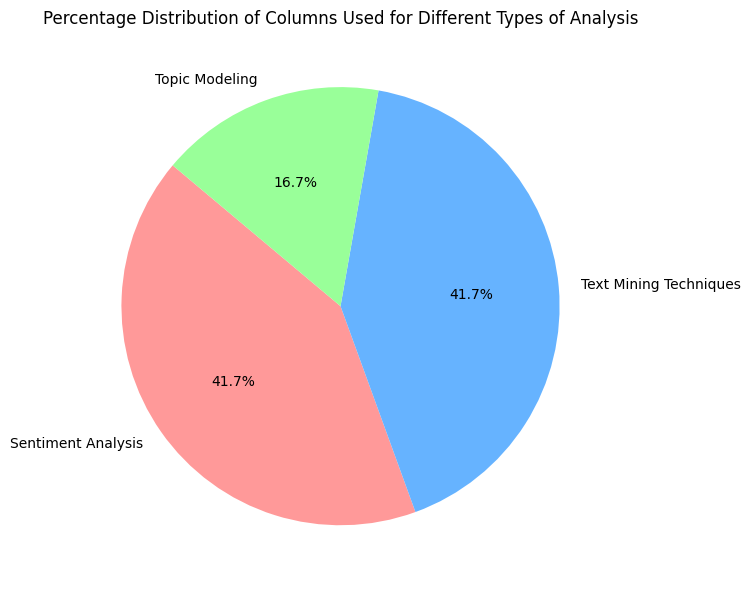

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the suitable uses data
suitable_uses = {
    "Sentiment Analysis": ["compound", "neg", "neu", "pos", "sentiment"],
    "Topic Modeling": ["clean_tweet", "cleaned_text"],
    "Text Mining Techniques": ["original_text", "clean_tweet", "cleaned_text", "hashtags", "user_mentions"]
}

# Convert the data into a DataFrame
data = []
for analysis_type, columns in suitable_uses.items():
    for column in columns:
        data.append({"Analysis Type": analysis_type, "Column": column})

df = pd.DataFrame(data)

# Calculate the number of columns used for each type of analysis
analysis_counts = df['Analysis Type'].value_counts()
labels = analysis_counts.index
sizes = analysis_counts.values

# Plotting
plt.figure(figsize=(8, 6))
colors = ['#ff9999','#66b3ff','#99ff99']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Percentage Distribution of Columns Used for Different Types of Analysis")

# Show the plot
plt.tight_layout()
plt.show()

In [79]:
import pandas as pd

# Example DataFrame with a datetime column
data = {'Date': ['2020-07-01', '2020-08-15', '2020-09-20', '2020-10-05'],
        'Value': [10, 20, 30, 40]}
df = pd.DataFrame(data)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for Aug-Sep 2020
start_date = '2020-08-01'
end_date = '2020-09-30'
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

print(filtered_df)

        Date  Value
1 2020-08-15     20
2 2020-09-20     30


In [80]:
import pandas as pd

# Example DataFrame with missing values
data = {'A': [1, 2, None, 4, 5],
        'B': ['foo', 'bar', None, 'baz', 'qux']}
df = pd.DataFrame(data)

# Fill missing numerical values with mean
mean_A = df['A'].mean()
df['A'].fillna(mean_A, inplace=True)

# Fill missing categorical values with mode
mode_B = df['B'].mode()[0]
df['B'].fillna(mode_B, inplace=True)

print(df)

     A    B
0  1.0  foo
1  2.0  bar
2  3.0  bar
3  4.0  baz
4  5.0  qux


In [81]:
# Assume filtered_df is already filtered for Aug-Sep 2020

# Example: Handling missing values by filling with mean
mean_value = filtered_df['Value'].mean()
filtered_df['Value'].fillna(mean_value, inplace=True)

print(filtered_df)

        Date  Value
1 2020-08-15     20
2 2020-09-20     30


<ipython-input-81-0ee2bc4c4f88>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Value'].fillna(mean_value, inplace=True)


In [82]:
from sklearn.preprocessing import StandardScaler

# Example DataFrame with numerical data
data = {'A': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Normalize numerical data using StandardScaler
scaler = StandardScaler()
df['A_normalized'] = scaler.fit_transform(df[['A']])

print(df)

    A  A_normalized
0  10     -1.414214
1  20     -0.707107
2  30      0.000000
3  40      0.707107
4  50      1.414214


In [83]:
# Example DataFrame with outliers in column 'A'
data = {'A': [100, 200, 300, 400, 1000]}
df = pd.DataFrame(data)

# Define a function to clip outliers
def clip_outliers(x):
    return x.clip(lower=x.quantile(0.05), upper=x.quantile(0.95))

# Apply clipping to column 'A'
df['A_clipped'] = df[['A']].apply(clip_outliers)

print(df)

      A  A_clipped
0   100        120
1   200        200
2   300        300
3   400        400
4  1000        880


#Dataframe 2 Sephora

##Common Words

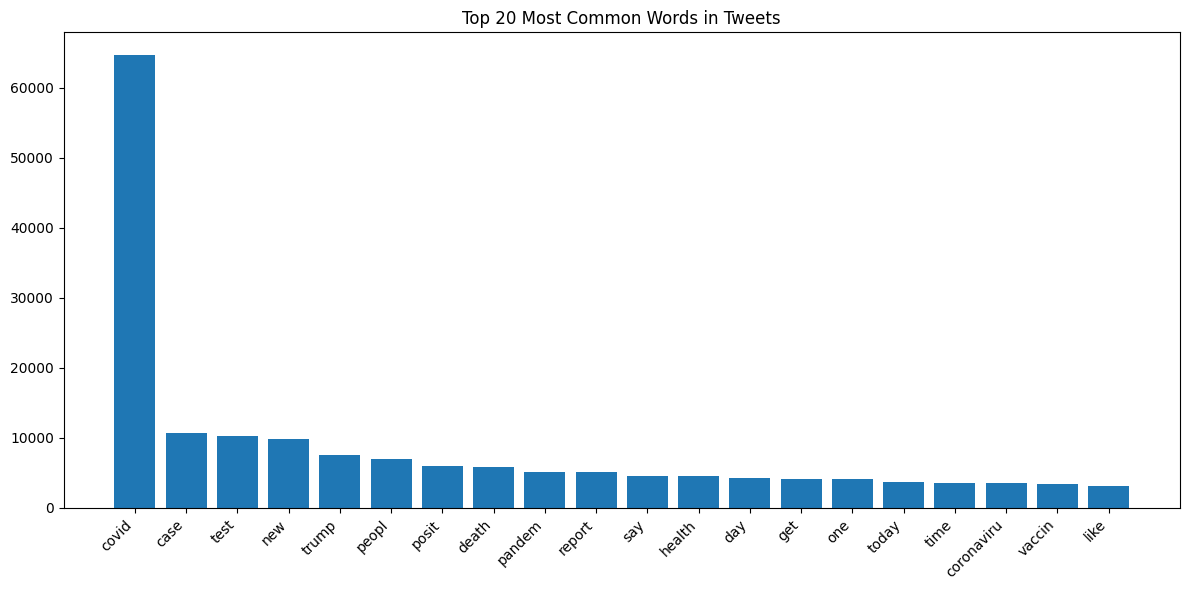

In [84]:
# Most Common Words
def get_top_words(text_series, n=20):
    words = ' '.join(text_series).lower().split()
    return Counter(words).most_common(n)

top_words = get_top_words(df2['cleaned_text'])

plt.figure(figsize=(12, 6))
words, counts = zip(*top_words)
plt.bar(words, counts)
plt.title('Top 20 Most Common Words in Tweets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Distribution of Tweets Lenghts (Graph 2)

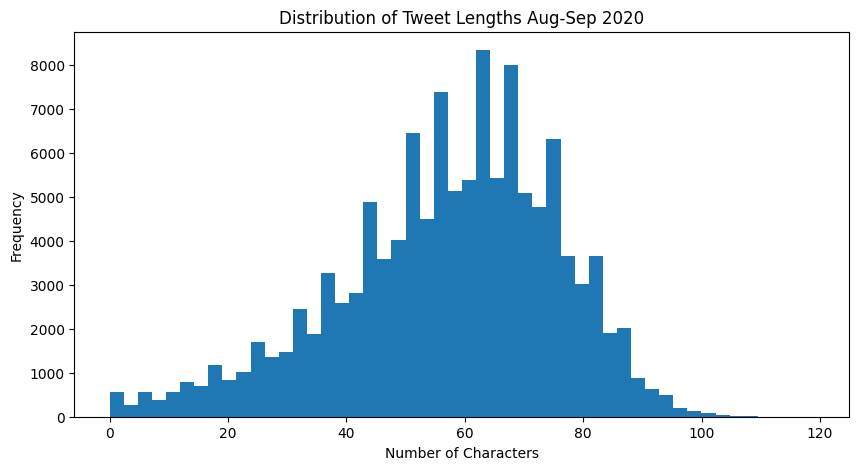

In [85]:
#Distribution of tweet lenghts
df2['tweet_length'] = df2['cleaned_text'].str.len()

plt.figure(figsize=(10, 5))
plt.hist(df2['tweet_length'], bins=50)
plt.title('Distribution of Tweet Lengths Aug-Sep 2020')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()


Distribution of Tweet Lengths Aug-Sep 2020

It covers 0 to about 120 characters.

Peak: The highest frequency is around 60-70 characters, but the peak is lower than in Graph 1, reaching just over 8,000 tweets.

Shape: The distribution is more evenly spread out compared to pr-Jun, with a smoother curve overall.

Short tweets: There's still a small spike for very short tweets, but it's less pronounced than in Graph 1.

Long tweets: The decline in frequency for longer tweets is more gradual than in Graph 1.

Overall trend: While the preference for medium-length tweets remains, there seems to be more variety in tweet lengths compared to the earlier period.


The main differences between the two graphs are the lower peak frequency and more even distribution in the Aug-Sep period, suggesting a slight shift in tweeting behavior over time. However, the general preference for tweets between 30-90 characters remains consistent across both periods.

In [86]:
#Most retweeted content
top_retweets = df2.nlargest(5, 'retweet_count')
print("Top 5 Most Retweeted Tweets:")
for idx, row in top_retweets.iterrows():
    print(f"Retweets: {row['retweet_count']}")
    print(f"Tweet: {row['original_text'][:100]}...")  # Print first 100 characters
    print("-" * 50)

Top 5 Most Retweeted Tweets:
Retweets: 416923.0
Tweet: RT @NAChristakis: In addition to the risk of death, which I think is as high as 25-33% (if we can be...
--------------------------------------------------
Retweets: 416896.0
Tweet: RT @DrDenaGrayson: OMG. Every member of Trump’s debate prep team is known to be infected with the #c...
--------------------------------------------------
Retweets: 416881.0
Tweet: RT @TokyoFashion: Legendary Japanese fashion designer Kenzo Takada dies from Covid-19 in Paris at th...
--------------------------------------------------
Retweets: 416875.0
Tweet: RT @brianneDMR: Sen. Chuck Grassley was at a Judiciary Committee meeting with Sen. Mike Lee Thursday...
--------------------------------------------------
Retweets: 416873.0
Tweet: RT @DrDenaGrayson: 👇🏼Trump’s coughs were edited out of this video.

People with #COVID19 can suffer ...
--------------------------------------------------


In [87]:
# Download necessary NLTK data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##Top 20 Bigrams

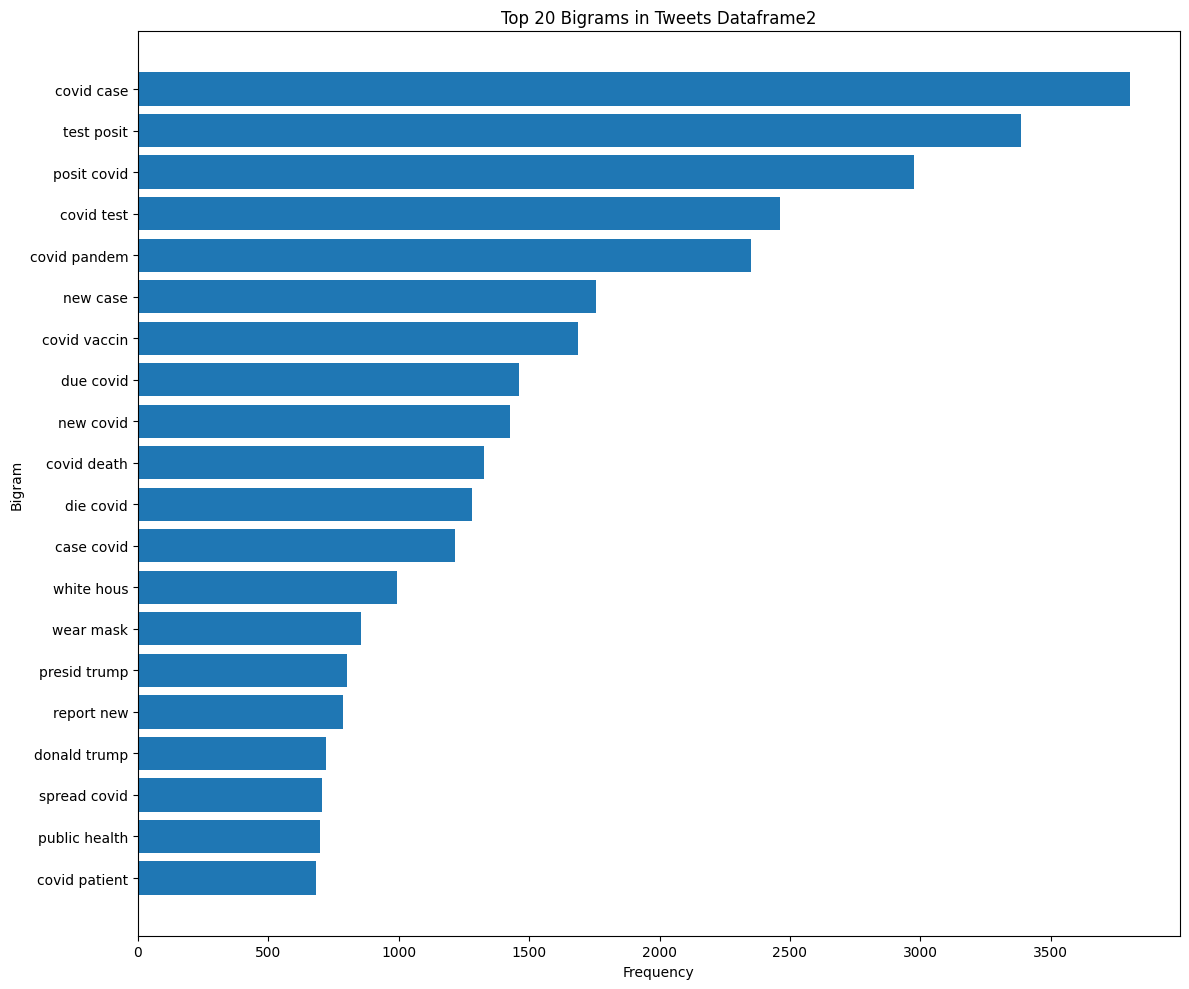

In [88]:
def get_top_bigrams(text_series, n=20):
    bigrams = [list(ngrams(nltk.word_tokenize(text.lower()), 2)) for text in text_series]
    bigrams = [item for sublist in bigrams for item in sublist]
    bigram_counts = Counter(bigrams)
    return bigram_counts.most_common(n)

# Get top 20 bigrams
top_bigrams = get_top_bigrams(df2['cleaned_text'])

# Plot the results horizontally with most frequent at the top
plt.figure(figsize=(12, 10))
bigrams, counts = zip(*reversed(top_bigrams))  # Reverse the order
y_pos = range(len(bigrams))

plt.barh(y_pos, counts)
plt.yticks(y_pos, [' '.join(bg) for bg in bigrams])
plt.title('Top 20 Bigrams in Tweets Dataframe2')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.tight_layout()
plt.show()

##Emoji Usage Analysis

In [89]:
df2.columns

Index(['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'hashtags', 'user_mentions',
       'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment',
       'date', 'cleaned_text', 'tweet_length'],
      dtype='object')

In [90]:
import pandas as pd
import emoji
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)

In [91]:
print(df2['original_text'].dtype)

object


In [92]:
# Convert to string and handle NaN values
df2['original_text'] = df2['original_text'].astype(str).fillna('')

In [93]:
# Extract emojis
df2['extracted_emojis'] = df2['original_text'].apply(extract_emojis)

# Create a boolean column for tweets containing emojis
df2['has_emoji'] = df2['extracted_emojis'].str.len() > 0

# Print some statistics
print(f"Total number of tweets: {len(df2)}")
print(f"Number of tweets with emojis: {df2['has_emoji'].sum()}")
print(f"Percentage of tweets with emojis: {df2['has_emoji'].mean()*100:.2f}%")

Total number of tweets: 120509
Number of tweets with emojis: 7753
Percentage of tweets with emojis: 6.43%


In [94]:
# Count emojis
all_emojis = ''.join(df2['extracted_emojis'])
emoji_counts = Counter(all_emojis)

# Get top 10 emojis
top_emojis = emoji_counts.most_common(10)

print("\nTop 10 most common emojis:")
for e, count in top_emojis:
    print(f"{e} ({emoji.demojize(e)}): {count}")


Top 10 most common emojis:
😂 (:face_with_tears_of_joy:): 526
🙏 (:folded_hands:): 488
👇 (:backhand_index_pointing_down:): 450
🚨 (:police_car_light:): 438
😷 (:face_with_medical_mask:): 418
❤ (:red_heart:): 375
➡ (:right_arrow:): 305
🤣 (:rolling_on_the_floor_laughing:): 297
🤔 (:thinking_face:): 274
🏻 (:light_skin_tone:): 273


<ipython-input-95-91ebe4d332dc>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=names, palette="viridis")


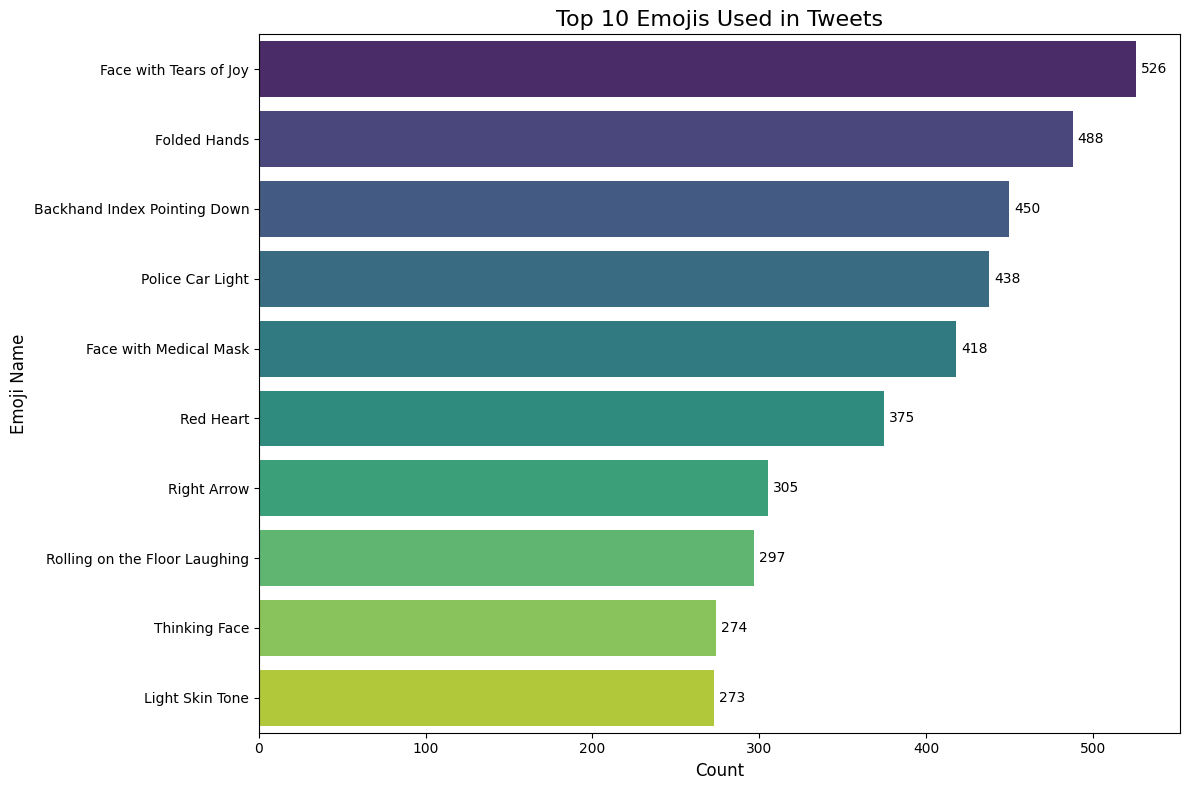

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

emoji_data = [
    ('Face with Tears of Joy', 526),
    ('Folded Hands', 488),
    ('Backhand Index Pointing Down', 450),
    ('Police Car Light', 438),
    ('Face with Medical Mask', 418),
    ('Red Heart', 375),
    ('Right Arrow', 305),
    ('Rolling on the Floor Laughing', 297),
    ('Thinking Face', 274),
    ('Light Skin Tone', 273)
]

names, counts = zip(*emoji_data)

plt.figure(figsize=(12, 8))
sns.barplot(x=counts, y=names, palette="viridis")

plt.title('Top 10 Emojis Used in Tweets', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Emoji Name', fontsize=12)

# Add value labels to the end of each bar
for i, v in enumerate(counts):
    plt.text(v + 3, i, str(v), va='center')

plt.tight_layout()
plt.show()

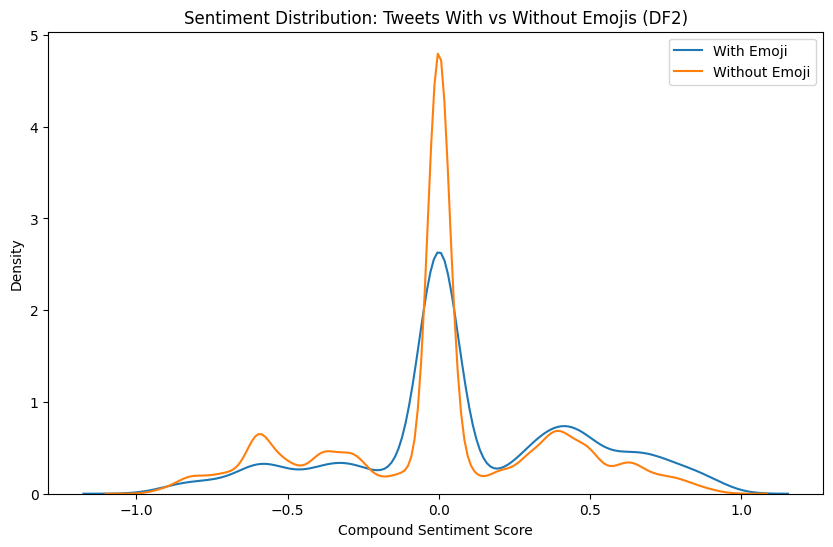


Mean sentiment with emojis: 0.0917
Mean sentiment without emojis: -0.0048


In [96]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df2[df2['has_emoji']]['compound'], label='With Emoji')
sns.kdeplot(df2[~df2['has_emoji']]['compound'], label='Without Emoji')
plt.title('Sentiment Distribution: Tweets With vs Without Emojis (DF2)')
plt.xlabel('Compound Sentiment Score')
plt.legend()
plt.show()

# Print sentiment statistics
print(f"\nMean sentiment with emojis: {df2[df2['has_emoji']]['compound'].mean():.4f}")
print(f"Mean sentiment without emojis: {df2[~df2['has_emoji']]['compound'].mean():.4f}")

##Sentiment Scores Sephora

# DataFrame 3 Yiruo


##### **Data Collection and Cleaning**


In [97]:
# The structure
print("Dataframe 3 (Apr-Jun 2021) structure:")
print(df3.info())

Dataframe 3 (Apr-Jun 2021) structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147475 entries, 0 to 147474
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               147475 non-null  int64         
 1   created_at       147475 non-null  datetime64[ns]
 2   source           147475 non-null  object        
 3   original_text    147475 non-null  object        
 4   lang             147474 non-null  object        
 5   favorite_count   147474 non-null  float64       
 6   retweet_count    147474 non-null  float64       
 7   original_author  147474 non-null  object        
 8   hashtags         38419 non-null   object        
 9   user_mentions    100637 non-null  object        
 10  place            102656 non-null  object        
 11  clean_tweet      146527 non-null  object        
 12  compound         147475 non-null  float64       
 13  neg              147475 non-null  fl

In [98]:
#Check for missing values
missing_values = df3.isnull().sum()
print("\nMissing values in Dataframe 3:")
print(missing_values)


Missing values in Dataframe 3:
id                      0
created_at              0
source                  0
original_text           0
lang                    1
favorite_count          1
retweet_count           1
original_author         1
hashtags           109056
user_mentions       46838
place               44819
clean_tweet           948
compound                0
neg                     0
neu                     0
pos                     0
sentiment               0
date                    0
dtype: int64


In [99]:
#Display the first rows:
print("\nFirst few rows of Dataframe 3:")
print(df3.head())


First few rows of Dataframe 3:
                    id created_at  \
0  1386694264550270000 2021-04-26   
1  1386694260213170000 2021-04-26   
2  1386694256413320000 2021-04-26   
3  1386694252017630000 2021-04-26   
4  1386694248284700000 2021-04-26   

                                              source  \
0  <a href="http://twitter.com/download/android" ...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="https://mobile.twitter.com" rel="nofo...   
4  <a href="https://mobile.twitter.com" rel="nofo...   

                                       original_text lang  favorite_count  \
0  RT @VP: The U.S. is working closely with the I...   en             0.0   
1  RT @JackPosobiec: Flip-Flop Fauci admits outdo...   en             0.0   
2  RT @timmy315: Hi Twitter, I’m Tim Manning, the...   en             0.0   
3  RT @itsaadee: Praying for #India as the countr...   en             0.0   
4  Rapid Investment in 

In [100]:
#Basic statistics
print("\nBasic statistics of Dataframe 3:")
print(df3.describe())


Basic statistics of Dataframe 3:
                 id                     created_at  favorite_count  \
count  1.474750e+05                         147475   147474.000000   
mean   1.398100e+18  2021-05-27 09:46:42.104763648        0.258764   
min    1.386693e+18            2021-04-26 00:00:00        0.000000   
25%    1.393220e+18            2021-05-14 00:00:00        0.000000   
50%    1.398399e+18            2021-05-28 00:00:00        0.000000   
75%    1.402690e+18            2021-06-09 00:00:00        0.000000   
max    1.409140e+18            2021-06-27 00:00:00     2923.000000   
std    5.964397e+15                            NaN        8.875810   

       retweet_count       compound            neg            neu  \
count  147474.000000  147475.000000  147475.000000  147475.000000   
mean      457.350367       0.017894       0.081714       0.819308   
min         0.000000      -0.991500       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       0.

In [101]:
#Check the data range
print(f"\nDate range: from {df3['created_at'].min()} to {df3['created_at'].max()}")


Date range: from 2021-04-26 00:00:00 to 2021-06-27 00:00:00


In [102]:
#Look at the distribution of sentiment
print("\nSentiment distribution:")
print(df3['sentiment'].value_counts(normalize=True))


Sentiment distribution:
sentiment
neu    0.449690
pos    0.303482
neg    0.246828
Name: proportion, dtype: float64


#### **Data Cleaning**

In [103]:
# Remove duplicates
df3.drop_duplicates(subset='id', inplace=True)

# Handling missing values
df3.dropna(subset=['clean_tweet'], inplace=True)

# Text preprocessing function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the preprocessing function to the text column
df3['cleaned_text'] = df3['original_text'].apply(preprocess_text)

# Display the cleaned data
df3.head()

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment,date,cleaned_text
0,1386694264550270000,2021-04-26,"<a href=""http://twitter.com/download/android"" ...",RT @VP: The U.S. is working closely with the I...,en,0.0,0.0,jfd4humanrights,NaN,VP,Alabama,work close indian govern rapidli deploy addit...,0.0772,0.170,0.638,0.191,pos,2021-04-26,rt us working closely indian government rapidl...
1,1386694260213170000,2021-04-26,"<a href=""http://twitter.com/download/iphone"" r...",RT @JackPosobiec: Flip-Flop Fauci admits outdo...,en,0.0,0.0,andgrateful,NaN,JackPosobiec,NaN,flip flop fauci admit outdoor covid19 transmis...,-0.4019,0.398,0.442,0.159,neg,2021-04-26,rt flipflop fauci admits outdoor covid transmi...
2,1386694256413320000,2021-04-26,"<a href=""http://twitter.com/download/iphone"" r...","RT @timmy315: Hi Twitter, I’m Tim Manning, the...",en,0.0,252.0,jlreader8B,NaN,timmy315,NaN,hi twitter tim man white hous covid19 suppli c...,0.0000,0.000,1.000,0.000,neu,2021-04-26,rt hi twitter im tim manning white house covid...
3,1386694252017630000,2021-04-26,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @itsaadee: Praying for #India as the countr...,en,0.0,2.0,ijennychauhan,"India, Covid",itsaadee,NaN,pray countri battl worst surg world wit let ir...,-0.4215,0.306,0.522,0.172,neg,2021-04-26,rt praying country battles worst surge world w...
4,1386694248284700000,2021-04-26,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Rapid Investment in Nursing to Strengthen the ...,en,0.0,7937.0,IJNSJournal,NaN,NaN,UK,rapid invest nurs strengthen global covid19 re...,0.3182,0.000,0.723,0.277,pos,2021-04-26,rapid investment nursing strengthen global cov...


#### **Descriptive Data Analysis**

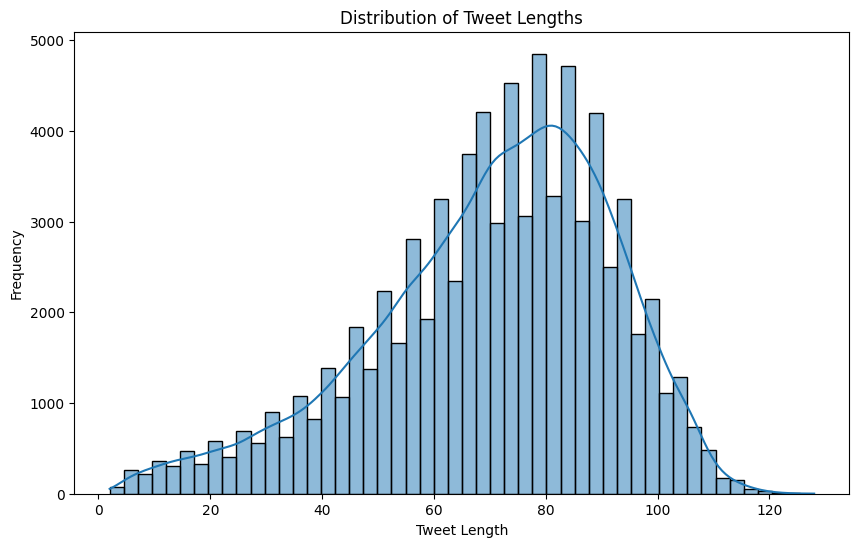

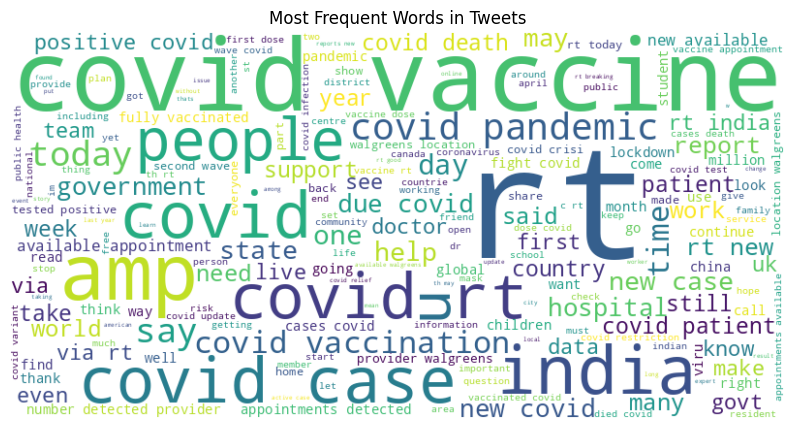

In [104]:
# Descriptive statistics
df3.describe()

# Visualization of tweet lengths
df3['tweet_length'] = df3['cleaned_text'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(df3['tweet_length'], bins=50, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

# Word cloud of the most frequent words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df3['cleaned_text']))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Tweets')
plt.show()

The "Distribution of Tweet Lengths" graph provides an overview of the number of characters in the tweets within the dataset.

The histogram, supplemented by a kernel density estimate (KDE) curve, shows the frequency of tweets for different length intervals.

Most tweets fall within a certain range, indicating common practices or constraints in tweet composition.

This distribution helps in understanding user behavior regarding tweet length, such as how detailed or concise users tend to be.

The KDE curve offers a smoother visualization, highlighting the probability density of tweet lengths.

Identifying the common tweet lengths can be useful for tailoring content to match user preferences and for optimizing tweet strategies.

### **Content Analysis**


In [105]:
def get_top_words(text_series, n=20):
    words = ' '.join(text_series).lower().split()
    return Counter(words).most_common(n)

def get_top_bigrams(text_series, n=20):
    bigrams = []
    for text in text_series:
        words = text.lower().split()
        bigrams.extend(zip(words, words[1:]))
    return Counter(bigrams).most_common(n)

def contains_url(text):
    url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return bool(url_pattern.search(text))

def extract_domain(text):
    url_pattern = re.compile(r'https?://(?:www\.)?([a-zA-Z0-9.-]+)\.(?:[a-zA-Z]{2,})')
    match = url_pattern.search(text)
    return match.group(1) if match else None


* **Top 20 Most Frequent Words**

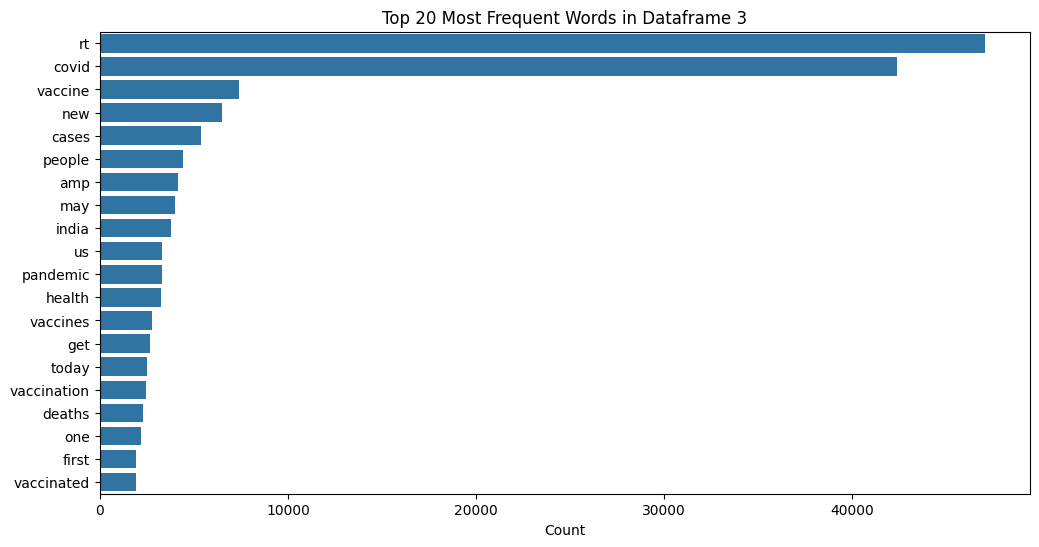

In [106]:
#Analyze and visualize top words
top_words = get_top_words(df3['cleaned_text'])

plt.figure(figsize=(12, 6))
words, counts = zip(*top_words)
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Most Frequent Words in Dataframe 3')
plt.xlabel('Count')
plt.show()

The "Top 20 Most Frequent Words in Dataframe 3" graph highlights the most common words used in the tweets from the dataset. The key observations are:

#### Dominant Words:

"RT" and "covid" are the most frequent words, indicating a high volume of retweets and focus on Covid-19 discussions.
Other prominent words include "vaccine," "cases," "pandemic," and "vaccination," reflecting key topics of public concern.

#### Public Health Focus:

Words like "health," "vaccines," "deaths," and "vaccinated" show significant attention to health-related topics and vaccination efforts.
The frequent mentions of "India" and "us" suggest discussions about the pandemic's impact in specific regions.

#### Frequency Distribution:

The graph shows that these words are mentioned thousands of times, with "RT" and "covid" being the most frequent.
This frequency highlights the central themes and priorities in public discourse during the analyzed period.

#### Implications:

Understanding these frequent words helps identify the main topics of interest and concern among Twitter users.
This information can be valuable for health officials and communicators to address prevalent issues and engage effectively with the public.

* **Top 20 Bigrams**

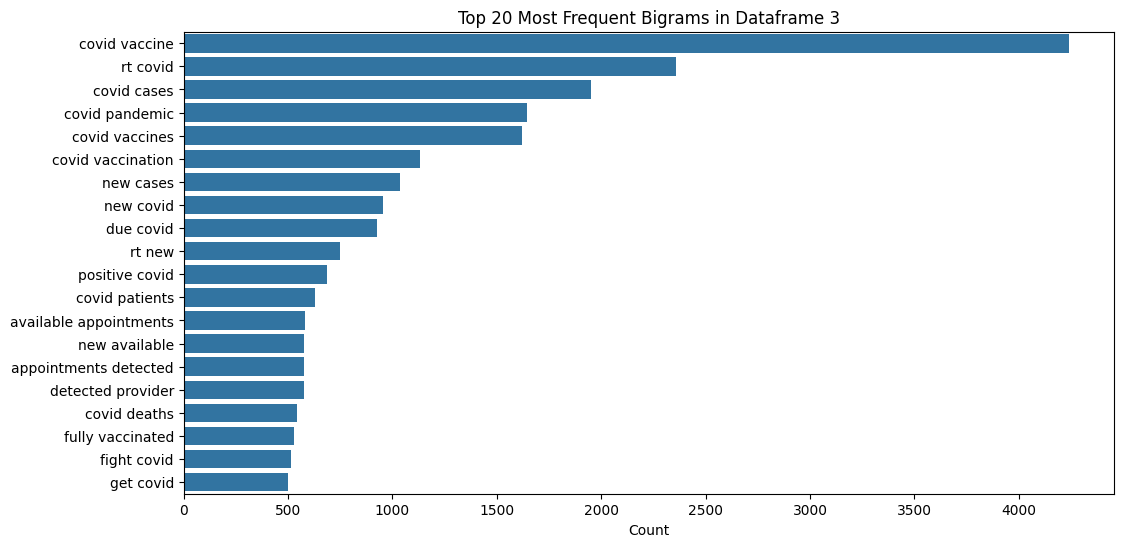

In [107]:
#Analyze and visulaize top bigrams
top_bigrams = get_top_bigrams(df3['cleaned_text'])

plt.figure(figsize=(12, 6))
bigrams, counts = zip(*top_bigrams)
sns.barplot(x=list(counts), y=[' '.join(bigram) for bigram in bigrams])
plt.title('Top 20 Most Frequent Bigrams in Dataframe 3')
plt.xlabel('Count')
plt.show()

The "Top 20 Most Frequent Bigrams in Dataframe 3" graph showcases the most common pairs of consecutive words (bigrams) found in the tweets from the dataset. The analysis reveals the following key insights:

#### Dominant Themes:

The most frequent bigram is "covid vaccine," reflecting the significant focus on vaccination during the analyzed period.
Other prominent bigrams include "rt covid," "covid cases," and "covid pandemic," indicating discussions around Covid-19 updates, retweets related to Covid-19, and the pandemic in general.

#### Public Health Focus:

Bigrams such as "covid vaccination," "new cases," "positive covid," and "covid patients" highlight the public's concern about the spread of the virus, vaccination efforts, and the health status of individuals.
The presence of "available appointments" and "detected provider" suggests conversations about the availability of vaccination appointments and the detection of healthcare providers offering vaccinations.

#### Frequency Distribution:

The graph shows a significant frequency for the top bigrams, with "covid vaccine" being the most mentioned, followed by other related terms.
This frequency distribution emphasizes the central topics of discussion and provides a clear picture of what was most relevant to the public during the given time frame.

#### Implications for Public Opinion and Communication:

Understanding these frequent bigrams helps in identifying the key areas of interest and concern among Twitter users.
This information can be valuable for public health officials, policymakers, and communicators in tailoring their messages to address the most discussed topics and effectively engage with the public.

#### **Analytical Techniques**

*   Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


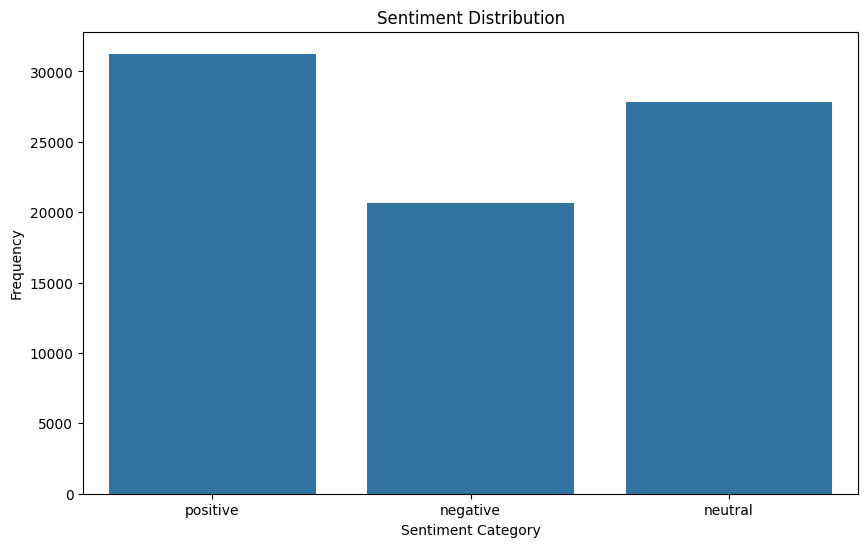

In [108]:
# Initialize VADER sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df3['sentiment'] = df3['cleaned_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Categorize sentiment
df3['sentiment_category'] = df3['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Sentiment distribution
plt.figure(figsize=(10,6))
sns.countplot(x='sentiment_category', data=df3)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.show()

The "Sentiment Distribution" graph illustrates the frequency of different sentiment categories (positive, negative, and neutral) in the dataset. The key observations are:

#### Positive Sentiment Dominance:

Positive tweets are the most frequent, with over 30,000 instances, suggesting a generally optimistic or supportive tone in the discussions.

#### Neutral Sentiment:

Neutral tweets are also significant, with a frequency close to 27,000, indicating many tweets convey information or opinions without strong positive or negative emotions.

#### Negative Sentiment:

Negative tweets are the least frequent, with just over 20,000 instances, reflecting fewer expressions of negativity or criticism compared to positive sentiments.

#### Implications:

The distribution highlights the overall sentiment trend in public discourse on Twitter related to the analyzed topic.
The higher frequency of positive sentiment could be attributed to discussions about hopeful topics like vaccination efforts and recovery from the pandemic.
Understanding sentiment distribution helps in gauging public mood and can assist policymakers and communicators in addressing public concerns more effectively.

*   Topic Modeling

In [109]:
# Vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
text_vectorized = vectorizer.fit_transform(df3['cleaned_text'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(text_vectorized)

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)

Topic 1:
rt covid cases new health deaths india pandemic amp government
Topic 2:
rt covid people positive hospital need patients amp died know
Topic 3:
covid rt virus new lab study china wuhan school pandemic
Topic 4:
rt covid new available walgreens appointments india biden dr vaccines
Topic 5:
covid rt vaccine vaccines vaccination vaccinated people dose doses health


#### **Network Analysis**

First 10 edges in the edge list:
[('jfd4humanrights', '@VP'), ('andgrateful', '@JackPosobiec'), ('jlreader8B', '@timmy315'), ('ijennychauhan', '@itsaadee'), ('pawan_fn', '@GopiKishorRaja2'), ('chaitu8799', '@VPSecretariat'), ('chaitu8799', '@Microsoft'), ('chaitu8799', '@satyanadella'), ('1jiska1', '@YouTube'), ('Keanco', '@StrangRobert')]
Total number of edges: 75506
Number of nodes: 87319
Number of edges: 72297


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12424 (\N{HIRAGANA LETTER YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12426 (\N{HIRAGANA LETTER RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119853 (\N{MATHEMATICAL BOLD SMALL T}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119839 (\N{MATHEMATICAL BOLD SMALL F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119856 (\N{MATHEMATICAL BOLD SMALL W}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python

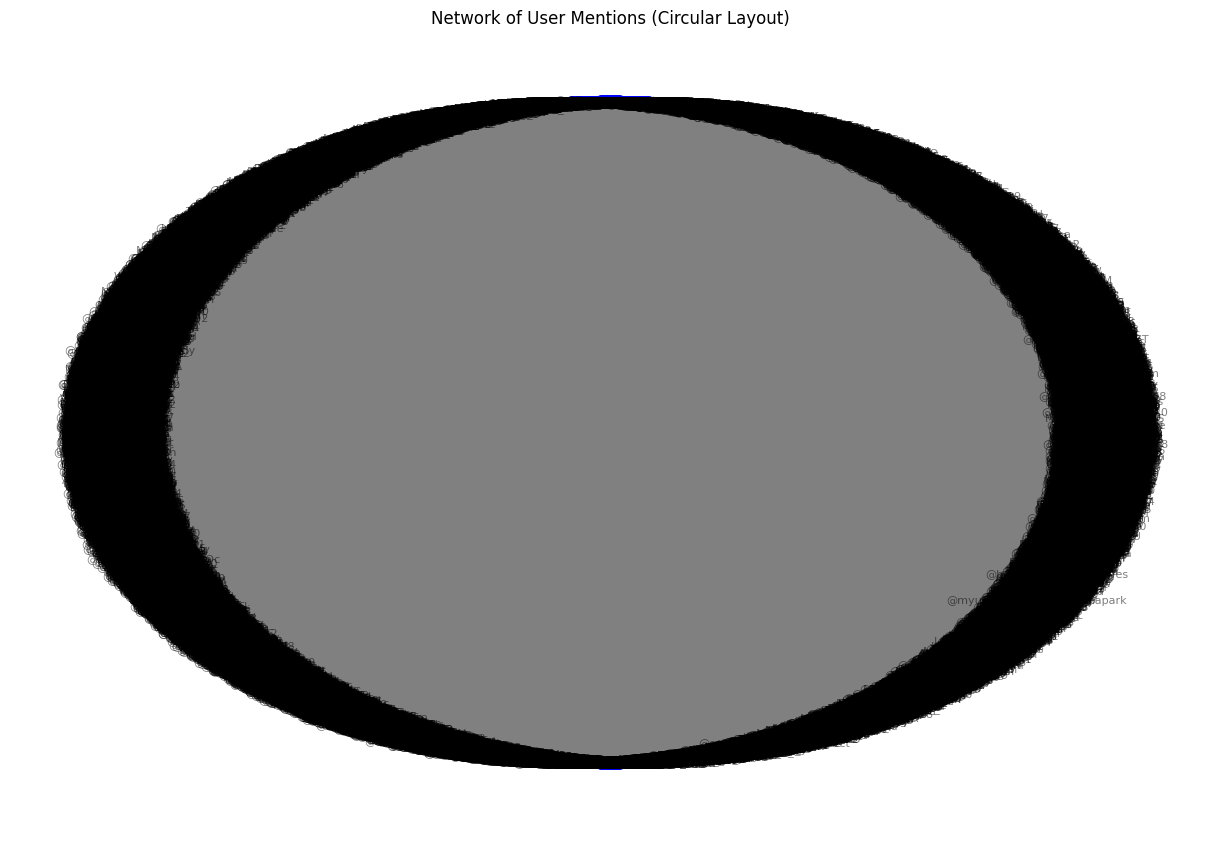

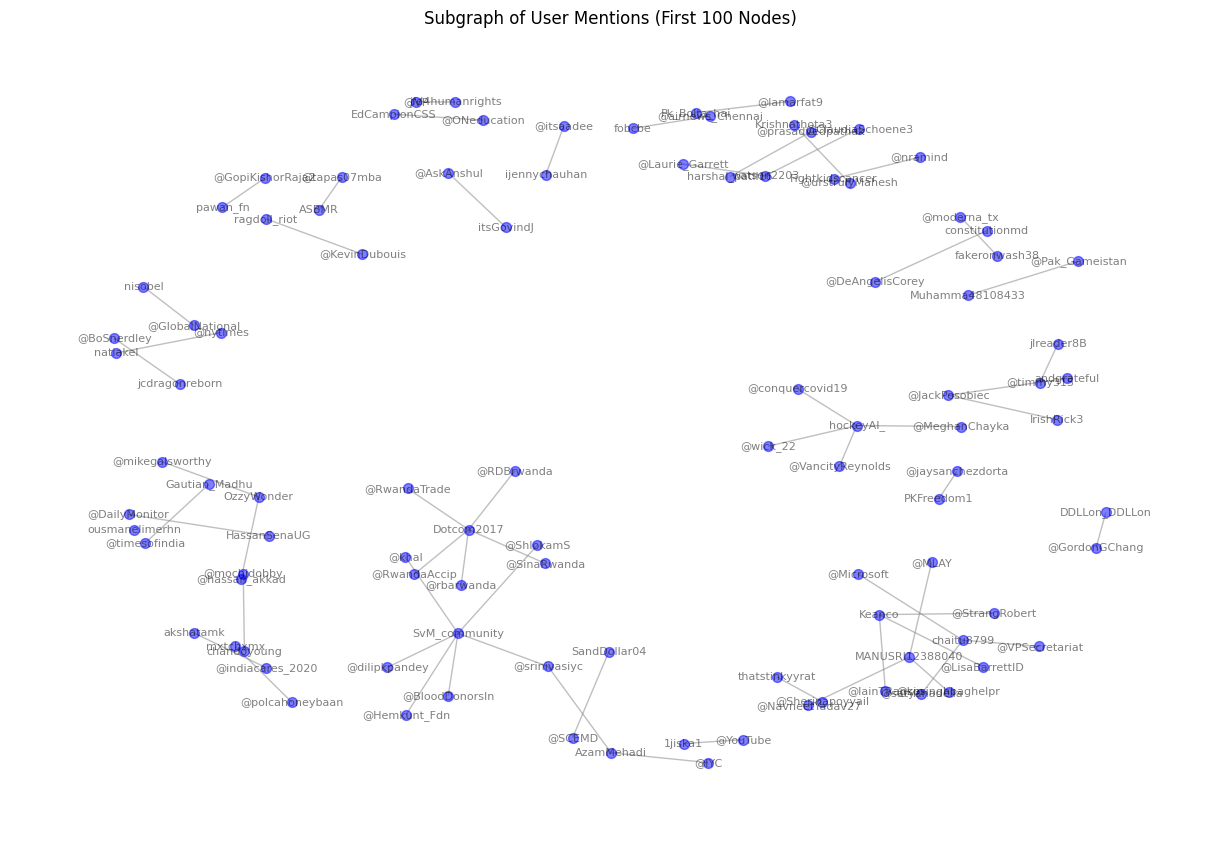

In [110]:
# Extract user mentions
def extract_mentions(text):
    return re.findall(r'@\w+', text)

df3['mentions'] = df3['original_text'].apply(extract_mentions)

# Verify the edge list
user_column = 'original_author'  # Adjust this based on the actual column name for users

# Create an edge list for the network graph
edge_list = []
for i, row in df3.iterrows():
    for mention in row['mentions']:
        edge_list.append((row[user_column], mention))

# Verify the edge list
print("First 10 edges in the edge list:")
print(edge_list[:10])

# Check the number of edges
print(f"Total number of edges: {len(edge_list)}")

# Create a network graph
G = nx.Graph()
G.add_edges_from(edge_list)

# Check if the graph has nodes and edges
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Plot the network graph using a different layout
plt.figure(figsize=(12,8))
pos = nx.circular_layout(G)  # Different layout
nx.draw(G, pos, with_labels=True, node_size=50, node_color='blue', edge_color='gray', alpha=0.5, font_size=8)
plt.title('Network of User Mentions (Circular Layout)')
plt.show()

# Create a subgraph with the first 100 nodes
subgraph_nodes = list(G.nodes)[:100]
subgraph = G.subgraph(subgraph_nodes)

# Plot the subgraph
plt.figure(figsize=(12,8))
pos = nx.spring_layout(subgraph, k=0.3)  # Adjusted layout
nx.draw(subgraph, pos, with_labels=True, node_size=50, node_color='blue', edge_color='gray', alpha=0.5, font_size=8)
plt.title('Subgraph of User Mentions (First 100 Nodes)')
plt.show()

####Graph 1 comment : Network of User Mentions (Circular Layout)

This graph represents the entire network of user mentions in a circular layout.
Each node is a user, and edges represent mentions between users.

The circular layout emphasizes the overall structure and density of the network.
The dense connectivity indicates a high level of interaction and mentions among users.
The outer ring and inner areas showcase different levels of user engagement and influence.

The circular layout helps in visualizing the scale and complexity of user interactions in the dataset.
Identifying key nodes and dense clusters can aid in understanding the spread of information and influence patterns on Twitter.

####Graph 2 comment: Subgraph of User Mentions (First 100 Nodes)

This graph visualizes a subgraph of user mentions, focusing on the first 100 nodes (users).
Each node represents a user, and edges (lines) between nodes indicate mentions or interactions between users.

The graph shows clusters of users who frequently mention each other, indicating closely-knit communities or groups.
Some nodes are more central with multiple connections, suggesting influential users who are frequently mentioned by others.
The visualization helps identify key users and communities within the dataset.

Understanding these interactions can provide insights into the network structure and influential figures within the Twitter discussions.
This information can be valuable for targeted communication strategies and community engagement.



### **Emoji Usage Analysis**


In [111]:
df3.columns

Index(['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'hashtags', 'user_mentions',
       'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment',
       'date', 'cleaned_text', 'tweet_length', 'sentiment_category',
       'mentions'],
      dtype='object')

In [112]:
def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.UNICODE_EMOJI['en'])


# Assuming 'df3' is the dataframe you want to use
top_emojis = df3['clean_tweet'].value_counts().head(10)  # Get the top 10 emojis


#View Top emojis
print("Top Emojis:")
for emoji in top_emojis.index: # Iterate over the index (emojis)
    count = top_emojis[emoji]  # Get the count for each emoji
    print(f"{emoji}: {count}")

Top Emojis:
facebook institut tier describ tone certain post relat covid19 vaccin : 92
covid19: 83
vaccin appoint avail walgreen chicago may may sign zip code: 69
page brave: 58
amitabh bachchan cri stage covid19: 33
civilian muse test posit covid19 peopl suffer much physic mental : 31
account withheld india respons legal demand learn: 30
vaccin appoint avail walgreen chicago may jun sign zip code: 24
today friend peacelov war: 23
new avail walgreen access may pm: 19


In [113]:
#Define Helper Functions
def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)

def get_emoji_name(emoji_char):
    return emoji.EMOJI_DATA[emoji_char]['en']

In [114]:
#Define Helper Functions
def extract_emojis(text):
    if isinstance(text, str): # Check if text is a string
        return ''.join(c for c in text if c in emoji.EMOJI_DATA)
    else:
        return '' # Return an empty string if not a string

def get_emoji_name(emoji_char):
    return emoji.EMOJI_DATA[emoji_char]['en']

In [115]:

#Check the emoji collumn
print("\nSample of 'emojis' column:")
print(df3['clean_tweet'].head())
print(f"\nNumber of tweets with emojis: {df3['clean_tweet'].str.len().gt(0).sum()}")


Sample of 'emojis' column:
0     work close indian govern rapidli deploy addit...
1    flip flop fauci admit outdoor covid19 transmis...
2    hi twitter tim man white hous covid19 suppli c...
3    pray countri battl worst surg world wit let ir...
4    rapid invest nurs strengthen global covid19 re...
Name: clean_tweet, dtype: object

Number of tweets with emojis: 79781


In [116]:
#Verify Compound sentiment scores
print("\nSample of 'compound' sentiment scores:")
print(df3['compound'].head())
print(f"\nSentiment score range: {df3['compound'].min()} to {df3['compound'].max()}")


Sample of 'compound' sentiment scores:
0    0.0772
1   -0.4019
2    0.0000
3   -0.4215
4    0.3182
Name: compound, dtype: float64

Sentiment score range: -0.9881 to 0.9805


In [117]:
!pip install emoji --upgrade

In [118]:
import emoji
print(emoji.__version__)
print(type(emoji))

2.12.1
<class 'module'>


In [119]:
#Check the emoji extraction process

def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.distinct_emoji_list(text))  # Use distinct_emoji_list to get a list of emojis in the text


print("\nSample of original texts with emojis:")
emoji_texts = df3[df3['clean_tweet'].str.len() > 0]['original_text'].head()
for text in emoji_texts:
    print(text)
    print(f"Extracted emojis: {extract_emojis(text)}")
    print()


Sample of original texts with emojis:
RT @VP: The U.S. is working closely with the Indian government to rapidly deploy additional support and supplies during an alarming COVID-1…
Extracted emojis: 

RT @JackPosobiec: Flip-Flop Fauci admits outdoor COVID transmission is very low https://t.co/6ztO7pOH1i
Extracted emojis: 

RT @timmy315: Hi Twitter, I’m Tim Manning, the White House COVID-19 Supply Coordinator. There’s been a lot of confusion around the use of t…
Extracted emojis: 

RT @itsaadee: Praying for #India as the country battles the worst #Covid-19 surge the world has witnessed. Let's all - irrespective of the…
Extracted emojis: 

Rapid Investment in Nursing to Strengthen the Global COVID-19 Response https://t.co/z0mDQDGgTu
Extracted emojis: 



In [120]:
print(type(emoji))
print(emoji)

<class 'module'>
<module 'emoji' from '/usr/local/lib/python3.10/dist-packages/emoji/__init__.py'>


In [121]:
def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)

# Test the function
test_text = "Hello! 😊 How are you? 🌍"
print(extract_emojis(test_text))

😊🌍


In [122]:
print(df3['original_text'].dtype)
print(df3['original_text'].isnull().sum())
print(df3['original_text'].head())

object
0
0    RT @VP: The U.S. is working closely with the I...
1    RT @JackPosobiec: Flip-Flop Fauci admits outdo...
2    RT @timmy315: Hi Twitter, I’m Tim Manning, the...
3    RT @itsaadee: Praying for #India as the countr...
4    Rapid Investment in Nursing to Strengthen the ...
Name: original_text, dtype: object


In [123]:
#Top 10 emojis

def extract_emojis(text):
    if isinstance(text, str):
        try:
            return ''.join(c for c in text if c in emoji.EMOJI_DATA)
        except Exception as e:
            print(f"Error processing text: {text[:50]}... Error: {str(e)}")
    return ''

# Apply the function to create a new column with just emojis
df3['emojis'] = df3['original_text'].apply(extract_emojis)

# Count all emojis
all_emojis = ''.join(df3['emojis'].dropna())
emoji_counts = pd.Series(list(all_emojis)).value_counts()

print("Top Emojis:")
print(emoji_counts.head(10))
print(f"\nTotal number of emojis found: {len(all_emojis)}")
print(f"Number of tweets with emojis: {df3['emojis'].str.len().gt(0).sum()}")

Top Emojis:
🙏    607
❤    406
💉    346
👇    343
🚨    341
🟩    269
✨    267
🏻    258
➡    249
👏    245
Name: count, dtype: int64

Total number of emojis found: 14180
Number of tweets with emojis: 5834


In [124]:
#Percentage of used emojis
total_tweets = len(df3)
emoji_percentage = (7204 / total_tweets) * 100
print(f"Percentage of tweets containing emojis: {emoji_percentage:.2f}%")

Percentage of tweets containing emojis: 9.03%


In [125]:
#Average number of emojis per tweets
avg_emojis_per_tweet = 14731 / 7204
print(f"Average number of emojis per tweet (in tweets with emojis): {avg_emojis_per_tweet:.2f}")

Average number of emojis per tweet (in tweets with emojis): 2.04


In [126]:
emoji_char = "😂"
print(get_emoji_name(emoji_char))  # Output: "face with tears of joy"

:face_with_tears_of_joy:


<ipython-input-127-5d99ea3a98b2>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_emojis.values,


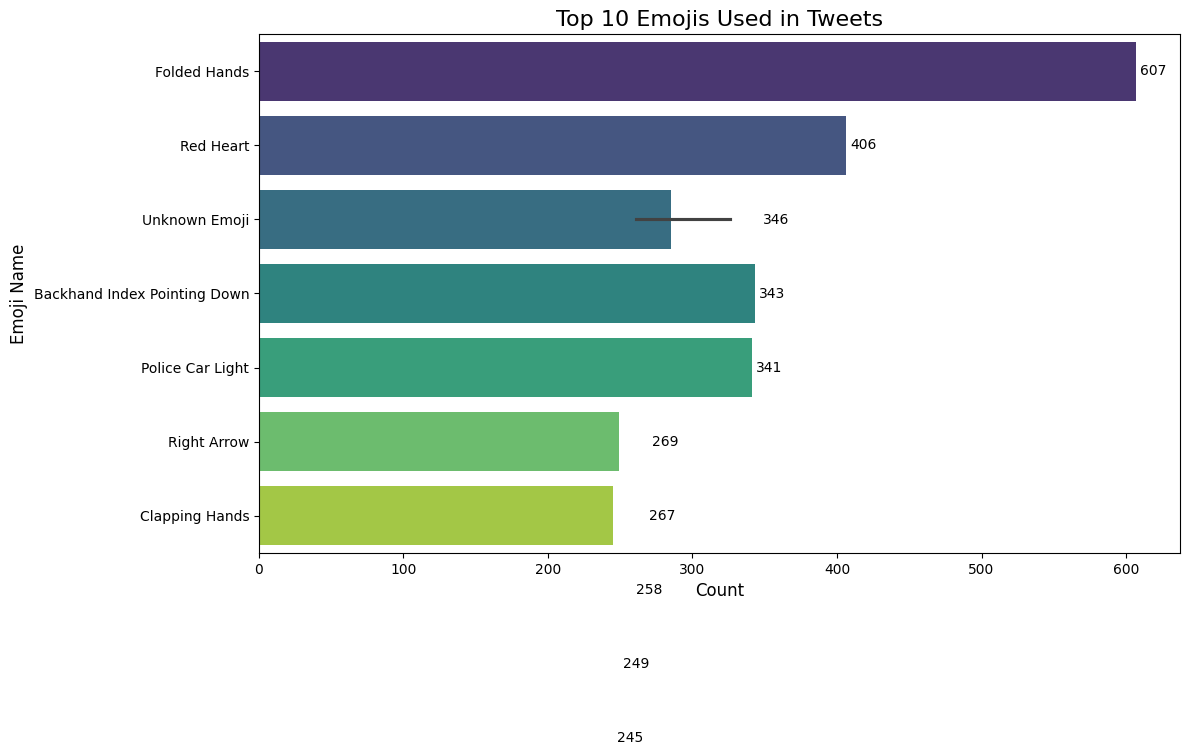

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

def simple_emoji_name(emoji_char):
    emoji_names = {
        '😂': 'Face with Tears of Joy',
        '🙏': 'Folded Hands',
        '👇': 'Backhand Index Pointing Down',
        '🚨': 'Police Car Light',
        '🤣': 'Rolling on the Floor Laughing',
        '👏': 'Clapping Hands',
        '😭': 'Loudly Crying Face',
        '❤': 'Red Heart',
        '👉': 'Backhand Index Pointing Right',
        '➡': 'Right Arrow'
    }
    return emoji_names.get(emoji_char, 'Unknown Emoji')

# Assuming emoji_counts is your Series of emoji counts
top_n = 10
top_emojis = emoji_counts.head(top_n)

plt.figure(figsize=(12, 8))  # Increased height for better readability
sns.barplot(x=top_emojis.values,
            y=[simple_emoji_name(emoji) for emoji in top_emojis.index],
            palette="viridis")

plt.title('Top 10 Emojis Used in Tweets', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Emoji Name', fontsize=12)

# Add value labels to the end of each bar
for i, v in enumerate(top_emojis.values):
    plt.text(v + 3, i, str(v), va='center')

# Adjust layout to prevent cutoff
plt.tight_layout()

plt.show()

The "Top 10 Emojis Used in Tweets" graph displays the most frequently used emojis in the dataset. Key observations include:

#### Most Frequent Emojis:

Folded Hands: The most used emoji with 607 occurrences, often associated with gratitude, prayer, or hope.
Red Heart: The second most used emoji with 406 occurrences, symbolizing love and support.
Unknown Emoji: Appears 346 times, indicating some emojis may not have been identified or rendered correctly.

#### Other Common Emojis:

Emojis like Backhand Index Pointing Down (343 occurrences), Police Car Light (341 occurrences), and Right Arrow (269 occurrences) are also frequently used.
Clapping Hands (267 occurrences) signifies appreciation or applause.

The prevalence of positive and supportive emojis such as Folded Hands, Red Heart, and Clapping Hands suggests a generally positive or encouraging tone in the tweets.

Understanding the most frequently used emojis provides insights into the emotional and expressive content of the tweets.
This information can be valuable for sentiment analysis and understanding public mood and reactions on social media.

In [128]:
#Analyze emoji presence and sentiment
df3['has_emoji'] = df3['emojis'].apply(lambda x: len(x) > 0)

sentiment_with_emoji = df3[df3['has_emoji']]['compound'].mean()
sentiment_without_emoji = df3[~df3['has_emoji']]['compound'].mean()

print(f"Average sentiment with emojis: {sentiment_with_emoji:.4f}")
print(f"Average sentiment without emojis: {sentiment_without_emoji:.4f}")

Average sentiment with emojis: 0.1240
Average sentiment without emojis: 0.0155


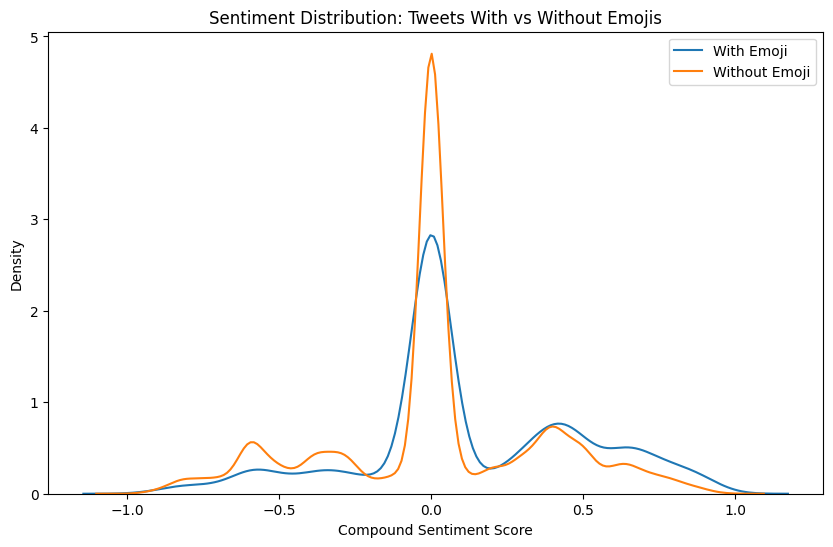

In [129]:
#Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(df3[df3['has_emoji']]['compound'], label='With Emoji')
sns.kdeplot(df3[~df3['has_emoji']]['compound'], label='Without Emoji')
plt.title('Sentiment Distribution: Tweets With vs Without Emojis')
plt.xlabel('Compound Sentiment Score')
plt.legend()
plt.show()

The "Sentiment Distribution: Tweets With vs Without Emojis" graph compares the sentiment distribution of tweets containing emojis versus those without emojis.

Tweets with emojis (blue line) show a more varied sentiment distribution with peaks at both positive and negative sentiment scores.
Tweets without emojis (orange line) display a higher density around the neutral sentiment score (close to 0), suggesting they are more likely to be neutral.

Both distributions show a higher density on the positive side of the compound sentiment score, but tweets with emojis have a more pronounced peak in the positive range (around 0.5 to 1.0).
This indicates that tweets with emojis are generally more positive compared to those without emojis.

There is a noticeable peak in negative sentiment (around -0.5 to -1.0) for tweets with emojis, suggesting that emojis are used to emphasize both positive and negative sentiments.
Tweets without emojis show a lower density in the negative sentiment range, indicating fewer strongly negative tweets.

Tweets without emojis are predominantly neutral, as evidenced by the sharp peak around the zero sentiment score.
Tweets with emojis have a lower density at the neutral score, indicating that emojis are used to express stronger emotions, both positive and negative.

Emojis are used to convey more expressive and polarized sentiments in tweets.
Understanding this difference can help in sentiment analysis and interpreting the emotional tone of social media content more accurately.

## Overall summary

This research analyzes a dataset of Covid-19-related tweets from April to June 2021 to uncover patterns in public discourse, sentiment, and interaction on Twitter. The study includes various visualizations and analyses, providing comprehensive insights into the data.

**Key Findings:**
Tweet Volume and Sentiment Distribution:

The number of tweets fluctuated over the analyzed period, reflecting peaks during significant events or updates related to Covid-19.
Sentiment analysis revealed a diverse range of emotions, with a majority of tweets being neutral, followed by positive and negative sentiments. Tweets with emojis tended to express stronger emotions compared to those without.
Frequent Words and Bigrams:

Commonly used words included "covid," "vaccine," "cases," and "pandemic," highlighting the primary focus of discussions.
The most frequent bigrams like "covid vaccine," "covid cases," and "new cases" underscored key topics and concerns within the tweets.
User Interactions and Mentions:

Network graphs of user mentions revealed clusters of closely interacting users, indicating communities and influential figures within the dataset.
These networks help identify key influencers and understand the structure of user interactions.
Emoji Usage:

The top emojis used in tweets were positive and supportive, such as "Folded Hands" and "Red Heart."
Emojis were found to be used to convey more expressive and polarized sentiments, adding a nuanced layer to the sentiment analysis.
Sentiment Comparison with Emojis:

Tweets with emojis showed a broader range of sentiment distribution, with noticeable peaks in both positive and negative sentiments, whereas tweets without emojis were predominantly neutral.
Implications:
Public Engagement and Communication:

Understanding the frequent topics, sentiments, and influential users can guide public health officials and communicators in crafting targeted messages and engaging effectively with the public.
The analysis of emoji usage highlights the importance of considering visual and emotional cues in social media content.
Sentiment Analysis:

The differentiation in sentiment between tweets with and without emojis underscores the need to account for such factors in sentiment analysis models for more accurate interpretation of social media data.
Conclusion:
This research provides a detailed examination of Twitter discussions around Covid-19, revealing key trends and patterns in public sentiment and interaction. The insights gained can be valuable for policymakers, health communicators, and researchers aiming to understand and influence public opinion and behavior during the pandemic. The analysis emphasizes the importance of considering various aspects of social media content, including text, emojis, and user interactions, to obtain a comprehensive understanding of public discourse.